In [1]:
import pandas as pd
!pip install plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install tabulate
#from tabulate import tabulate
!pip install wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

### Airline CSV

In [2]:
airlines = pd.read_csv('../Data/airlines.csv')
airlines.tail()

Airline ID                    Name              Alias IATA ICAO  \
6157       21248             GX Airlines                NaN  NaN  CBG   
6158       21251  Lynx Aviation (L3/SSX)                NaN  NaN  SSX   
6159       21268         Jetgo Australia                NaN   JG   \N   
6160       21270            Air Carnival                NaN   2S   \N   
6161       21317           Svyaz Rossiya  Russian Commuter    7R  SJM   

             Callsign        Country Active  
6157            SPRAY          China      Y  
6158           Shasta  United States      N  
6159              NaN      Australia      Y  
6160              NaN          India      Y  
6161  RussianConnecty         Russia      Y

In [3]:
airlines.columns

Index(['Airline ID', 'Name', 'Alias', 'IATA', 'ICAO', 'Callsign', 'Country',
       'Active'],
      dtype='object')

In [4]:
#how many rows?
airlines.shape

(6162, 8)

In [5]:
airlines.isnull().sum()

Airline ID       0
Name             0
Alias          506
IATA          4627
ICAO            87
Callsign       808
Country         15
Active           0
dtype: int64

In [6]:
#drop Alias column
airlines.drop('Alias', axis=1, inplace=True)
airlines.drop('Callsign', axis=1, inplace=True)
#airlines.head()

In [7]:
#subset for active airlines
airlines = airlines[airlines['Active']=='Y']
airlines.tail()

Airline ID              Name IATA ICAO    Country Active
6154       21179  Thai Vietjet Air  NaN  TVJ   Thailand      Y
6157       21248       GX Airlines  NaN  CBG      China      Y
6159       21268   Jetgo Australia   JG   \N  Australia      Y
6160       21270      Air Carnival   2S   \N      India      Y
6161       21317     Svyaz Rossiya   7R  SJM     Russia      Y

In [8]:
airlines.rename(columns = {'Airline ID':'AirLine_ID_al','Name':'Name_al', 'IATA':'IATA_al', 'ICAO':'ICAO_al','Country':'Country_al', 'Active':'Active_al'}, inplace=True)
airlines.head(2)
#unknown and private, etc., will drop out when joined with delays

AirLine_ID_al         Name_al IATA_al ICAO_al Country_al Active_al
0             -1         Unknown       -     NaN         \N         Y
1              1  Private flight       -     NaN        NaN         Y

In [9]:
airlines.shape

(1255, 6)

In [10]:
airlines.isnull().sum()

AirLine_ID_al      0
Name_al            0
IATA_al          240
ICAO_al           29
Country_al         2
Active_al          0
dtype: int64

In [11]:
airlines.Name_al.unique()

array(['Unknown', 'Private flight', '1Time Airline', ...,
       'Jetgo Australia', 'Air Carnival', 'Svyaz Rossiya'], dtype=object)

In [12]:
#print(tabulate(airlines, headers='keys', tablefmt='pretty'))

In [13]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

In [14]:
#airlines['newname'] = airlines['Name']
#airlines.head(10)

In [15]:
#airlines['newname'] = airlines['newname'].str.replace('-',' ')
#airlines.head()

In [16]:
#airlines['newname'] = airlines['newname'].str.extract(r'(\w+\s+\w+)')
#airlines.head()

In [17]:
airlines.Name_al.value_counts()

Thomas Cook Airlines    2
Comair                  2
Air Salone              2
Tyrolean Airways        2
Jet Airways             2
                       ..
KD Avia                 1
Juneyao Airlines        1
Jetstar Airways         1
Jetflite                1
Svyaz Rossiya           1
Name: Name_al, Length: 1249, dtype: int64

### FAA Regions

In [18]:
FAA_Regions = pd.read_csv('../Data/Federal_Aviation_Administration_FAA_Regions.csv')
FAA_Regions.head(11)

FID                     REGION  CNT_REGION   Shape_Leng  Shape_Area
0    1         New England Region           6   152.233742   19.099946
1    2             Central Region           4    51.318016   78.091215
2    3            Southern Region           8   471.324583   94.856190
3    4     Western Pacific Region           4    94.202014  101.933953
4    5           Southwest Region           5   428.811114  138.650729
5    6         Great Lakes Region           8   189.109110  139.986989
6    7             Eastern Region           8   308.913778   48.682795
7    8  Northwest Mountain Region           7   151.363696  197.475811
8    9              Alaska Region           1  1033.192985  278.612678

In [19]:
FAA_Regions.columns

Index(['FID', 'REGION', 'CNT_REGION', 'Shape_Leng', 'Shape_Area'], dtype='object')

### Airports

In [20]:
airports = pd.read_csv('../Data/Airports.csv')
airports.head()

Airport ID                                         Name          City  \
0           1                               Goroka Airport        Goroka   
1           2                               Madang Airport        Madang   
2           3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3           4                               Nadzab Airport        Nadzab   
4           5  Port Moresby Jacksons International Airport  Port Moresby   

            Country IATA  ICAO  Latitude   Longitude  Altitude Timezone DST  \
0  Papua New Guinea  GKA  AYGA -6.081690  145.391998      5282       10   U   
1  Papua New Guinea  MAG  AYMD -5.207080  145.789001        20       10   U   
2  Papua New Guinea  HGU  AYMH -5.826790  144.296005      5388       10   U   
3  Papua New Guinea  LAE  AYNZ -6.569803  146.725977       239       10   U   
4  Papua New Guinea  POM  AYPY -9.443380  147.220001       146       10   U   

  Tz database time zone     Type       Source  
0  Pacific/Port_Moresby  airport  OurAirports  
1  Pacific/Port_Moresby  airport  OurAirports  
2  Pacific/Port_Moresby  airport  OurAirports  
3  Pacific/Port_Moresby  airport  OurAirports  
4  Pacific/Port_Moresby  airport  OurAirports

In [21]:
bna = airports[airports['IATA'] == 'BNA']
bna.head()

Airport ID                             Name       City        Country  \
3490        3690  Nashville International Airport  Nashville  United States   

     IATA  ICAO  Latitude  Longitude  Altitude Timezone DST  \
3490  BNA  KBNA   36.1245   -86.6782       599       -6   A   

     Tz database time zone     Type       Source  
3490       America/Chicago  airport  OurAirports

In [22]:
airports.shape

(7698, 14)

In [23]:
airports.columns

Index(['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude',
       'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz database time zone',
       'Type', 'Source'],
      dtype='object')

In [24]:
airports.drop(['DST', 'Tz database time zone', 'Type', 'Source'], axis=1, inplace=True)
airports.head(2)

Airport ID            Name    City           Country IATA  ICAO  Latitude  \
0           1  Goroka Airport  Goroka  Papua New Guinea  GKA  AYGA  -6.08169   
1           2  Madang Airport  Madang  Papua New Guinea  MAG  AYMD  -5.20708   

    Longitude  Altitude Timezone  
0  145.391998      5282       10  
1  145.789001        20       10

In [25]:
airports.rename(columns = {'Name':'Name_ap', 'Country':'Country_ap','IATA':'IATA_ap', 'ICAO':'ICAO_ap', 'Latitude':'Lat_ap', 'Longitude':'Long_ap', 'Altitude':'Alt_ap', 'Timezone':'TZone_ap'}, inplace=True)
airports.head(2)

Airport ID         Name_ap    City        Country_ap IATA_ap ICAO_ap  \
0           1  Goroka Airport  Goroka  Papua New Guinea     GKA    AYGA   
1           2  Madang Airport  Madang  Papua New Guinea     MAG    AYMD   

    Lat_ap     Long_ap  Alt_ap TZone_ap  
0 -6.08169  145.391998    5282       10  
1 -5.20708  145.789001      20       10

In [26]:
#airports['Country_ap'].unique()

In [27]:
#subset to United States
airports = airports[airports['Country_ap']=='United States']
airports.head()

Airport ID                     Name_ap             City     Country_ap  \
3212        3411  Barter Island LRRS Airport    Barter Island  United States   
3213        3412      Wainwright Air Station  Fort Wainwright  United States   
3214        3413  Cape Lisburne LRRS Airport    Cape Lisburne  United States   
3215        3414      Point Lay LRRS Airport        Point Lay  United States   
3216        3415  Hilo International Airport             Hilo  United States   

     IATA_ap ICAO_ap     Lat_ap     Long_ap  Alt_ap TZone_ap  
3212     BTI    PABA  70.134003 -143.582001       2       -9  
3213      \N    PAWT  70.613403 -159.860001      35       -9  
3214     LUR    PALU  68.875099 -166.110001      16       -9  
3215     PIZ    PPIZ  69.732903 -163.005005      22       -9  
3216     ITO    PHTO  19.721399 -155.048004      38      -10

In [28]:
airports.isnull().sum()

Airport ID    0
Name_ap       0
City          0
Country_ap    0
IATA_ap       0
ICAO_ap       0
Lat_ap        0
Long_ap       0
Alt_ap        0
TZone_ap      0
dtype: int64

### Passengers

In [29]:
passengers = pd.read_csv('../Data/US Monthly Air Passengers.csv')
passengers.tail(5)

Sum_PASSENGERS  AIRLINE_ID CARRIER_NAME ORIGIN  \
6278815               5     22074.0  Avon Jet AG    MFE   
6278816               2     22074.0  Avon Jet AG    PBI   
6278817               6     22074.0  Avon Jet AG    TEB   
6278818               3     22074.0  Avon Jet AG    TEB   
6278819               2     22074.0  Avon Jet AG    TEB   

                       ORIGIN_CITY_NAME ORIGIN_STATE_ABR ORIGIN_STATE_NM  \
6278815    Mission/McAllen/Edinburg, TX               TX           Texas   
6278816  West Palm Beach/Palm Beach, FL               FL         Florida   
6278817                   Teterboro, NJ               NJ      New Jersey   
6278818                   Teterboro, NJ               NJ      New Jersey   
6278819                   Teterboro, NJ               NJ      New Jersey   

        ORIGIN_COUNTRY ORIGIN_COUNTRY_NAME DEST               DEST_CITY_NAME  \
6278815             US       United States  VCE                Venice, Italy   
6278816             US       United States  FAB  Farnborough, United Kingdom   
6278817             US       United States  ATH               Athens, Greece   
6278818             US       United States  FRA           Frankfurt, Germany   
6278819             US       United States  KEF  Keflavik/Reykjavik, Iceland   

        DEST_STATE_ABR DEST_STATE_NM DEST_COUNTRY DEST_COUNTRY_NAME  YEAR  \
6278815            NaN           NaN           IT             Italy  2020   
6278816            NaN           NaN           GB    United Kingdom  2020   
6278817            NaN           NaN           GR            Greece  2020   
6278818            NaN           NaN           DE           Germany  2020   
6278819            NaN           NaN           IS           Iceland  2020   

         MONTH  
6278815      3  
6278816      3  
6278817      7  
6278818     10  
6278819      6

In [30]:
passengers.columns

Index(['Sum_PASSENGERS', 'AIRLINE_ID', 'CARRIER_NAME', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM',
       'ORIGIN_COUNTRY', 'ORIGIN_COUNTRY_NAME', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEST_COUNTRY', 'DEST_COUNTRY_NAME',
       'YEAR', 'MONTH'],
      dtype='object')

In [31]:
passengers = passengers.loc[:, ['YEAR', 'MONTH', 'Sum_PASSENGERS', 'AIRLINE_ID', 'CARRIER_NAME', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM',
       'ORIGIN_COUNTRY', 'ORIGIN_COUNTRY_NAME', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEST_COUNTRY', 'DEST_COUNTRY_NAME']]

In [32]:
passengers.tail(2)

YEAR  MONTH  Sum_PASSENGERS  AIRLINE_ID CARRIER_NAME ORIGIN  \
6278818  2020     10               3     22074.0  Avon Jet AG    TEB   
6278819  2020      6               2     22074.0  Avon Jet AG    TEB   

        ORIGIN_CITY_NAME ORIGIN_STATE_ABR ORIGIN_STATE_NM ORIGIN_COUNTRY  \
6278818    Teterboro, NJ               NJ      New Jersey             US   
6278819    Teterboro, NJ               NJ      New Jersey             US   

        ORIGIN_COUNTRY_NAME DEST               DEST_CITY_NAME DEST_STATE_ABR  \
6278818       United States  FRA           Frankfurt, Germany            NaN   
6278819       United States  KEF  Keflavik/Reykjavik, Iceland            NaN   

        DEST_STATE_NM DEST_COUNTRY DEST_COUNTRY_NAME  
6278818           NaN           DE           Germany  
6278819           NaN           IS           Iceland

In [33]:
#limit origin and destination flights within the US
passengers = passengers[(passengers['ORIGIN_COUNTRY']=='US') & (passengers['DEST_COUNTRY']=='US')]
passengers.head(3)

YEAR  MONTH  Sum_PASSENGERS  AIRLINE_ID CARRIER_NAME ORIGIN  \
0  2015      3               0         NaN          NaN    AEX   
1  2015      4               0         NaN          NaN    AEX   
2  2015      3               0         NaN          NaN    AEX   

  ORIGIN_CITY_NAME ORIGIN_STATE_ABR ORIGIN_STATE_NM ORIGIN_COUNTRY  \
0   Alexandria, LA               LA       Louisiana             US   
1   Alexandria, LA               LA       Louisiana             US   
2   Alexandria, LA               LA       Louisiana             US   

  ORIGIN_COUNTRY_NAME DEST         DEST_CITY_NAME DEST_STATE_ABR  \
0       United States  AEX         Alexandria, LA             LA   
1       United States  AFW  Dallas/Fort Worth, TX             TX   
2       United States  ATL            Atlanta, GA             GA   

  DEST_STATE_NM DEST_COUNTRY DEST_COUNTRY_NAME  
0     Louisiana           US     United States  
1         Texas           US     United States  
2       Georgia           US     United States

In [34]:
passengers.CARRIER_NAME.unique()

array([nan, 'Reeve Aleutian Airways Inc.', 'Northwest Airlines Inc.',
       'Southwest Airlines Co.', 'Air Canada',
       'Compagnie Natl Air France', 'Finnair Oy', 'British Airways Plc',
       'British West Indian Airways', 'China Airlines Ltd.',
       'Japan Air Lines Co. Ltd.', 'Klm Royal Dutch Airlines',
       'Polynesian Airlines Ltd.', 'Singapore Airlines Ltd.',
       'Tap-Portuguese Airlines', 'Heavylift Cargo Airlines Lt',
       'Saudi Arabian Airlines Corp', 'Air Sunshine Inc.',
       'Trans-Air-Link Corporation', 'Aloha Airlines Inc.',
       'Virgin Atlantic Airways', 'Horizon Air', 'Hawaiian Airlines Inc.',
       'Continental Air Lines Inc.', 'Delta Air Lines Inc.',
       'American Airlines Inc.', 'Turk Hava Yollari A.O.',
       'Nippon Cargo Airlines', 'Bradley Air Services Ltd.',
       'Air Transport International', 'Emery Worldwide Airlines',
       'Cayman Airways Limited', 'United Parcel Service',
       'Alaska Airlines Inc.', 'Air New Zealand', 'United Ai

In [35]:
passengers.YEAR.min()

2000

In [36]:
passengers.YEAR.max()

2020

In [37]:
#passengers[(passengers['CARRIER_NAME'] == 'Southwest Airlines Co.')]

In [38]:
passengers.tail(1)

YEAR  MONTH  Sum_PASSENGERS  AIRLINE_ID  \
6278580  2020      6               1     22048.0   

                                      CARRIER_NAME ORIGIN ORIGIN_CITY_NAME  \
6278580  Concierge U Ltd. d/b/a Jet Concierge Club    BOS       Boston, MA   

        ORIGIN_STATE_ABR ORIGIN_STATE_NM ORIGIN_COUNTRY ORIGIN_COUNTRY_NAME  \
6278580               MA   Massachusetts             US       United States   

        DEST   DEST_CITY_NAME DEST_STATE_ABR DEST_STATE_NM DEST_COUNTRY  \
6278580  FOK  Westhampton, NY             NY      New York           US   

        DEST_COUNTRY_NAME  
6278580     United States

In [39]:
passengers['AIRLINE_ID'] = passengers['AIRLINE_ID'].fillna(0)

In [40]:
passengers = passengers.astype({'AIRLINE_ID':'int'})
passengers = passengers.astype({'AIRLINE_ID':'str'})
passengers.tail(1)

YEAR  MONTH  Sum_PASSENGERS AIRLINE_ID  \
6278580  2020      6               1      22048   

                                      CARRIER_NAME ORIGIN ORIGIN_CITY_NAME  \
6278580  Concierge U Ltd. d/b/a Jet Concierge Club    BOS       Boston, MA   

        ORIGIN_STATE_ABR ORIGIN_STATE_NM ORIGIN_COUNTRY ORIGIN_COUNTRY_NAME  \
6278580               MA   Massachusetts             US       United States   

        DEST   DEST_CITY_NAME DEST_STATE_ABR DEST_STATE_NM DEST_COUNTRY  \
6278580  FOK  Westhampton, NY             NY      New York           US   

        DEST_COUNTRY_NAME  
6278580     United States

In [41]:
passengers.dtypes

YEAR                    int64
MONTH                   int64
Sum_PASSENGERS          int64
AIRLINE_ID             object
CARRIER_NAME           object
ORIGIN                 object
ORIGIN_CITY_NAME       object
ORIGIN_STATE_ABR       object
ORIGIN_STATE_NM        object
ORIGIN_COUNTRY         object
ORIGIN_COUNTRY_NAME    object
DEST                   object
DEST_CITY_NAME         object
DEST_STATE_ABR         object
DEST_STATE_NM          object
DEST_COUNTRY           object
DEST_COUNTRY_NAME      object
dtype: object

In [42]:
passengers.shape

(4892512, 17)

In [43]:
passengers.head(1)

YEAR  MONTH  Sum_PASSENGERS AIRLINE_ID CARRIER_NAME ORIGIN  \
0  2015      3               0          0          NaN    AEX   

  ORIGIN_CITY_NAME ORIGIN_STATE_ABR ORIGIN_STATE_NM ORIGIN_COUNTRY  \
0   Alexandria, LA               LA       Louisiana             US   

  ORIGIN_COUNTRY_NAME DEST  DEST_CITY_NAME DEST_STATE_ABR DEST_STATE_NM  \
0       United States  AEX  Alexandria, LA             LA     Louisiana   

  DEST_COUNTRY DEST_COUNTRY_NAME  
0           US     United States

In [44]:
passengers.rename(columns = {'YEAR':'year_pass', 'MONTH':'month_pass', 'Sum_PASSENGERS':'sum_pass', 'AIRLINE_ID':'al_id_pass', 'CARRIER_NAME':'carrier_pass', 'ORIGIN':'origin_pass',
       'ORIGIN_CITY_NAME':'or_city_pass', 'ORIGIN_STATE_ABR':'or_abbr_pass', 'ORIGIN_STATE_NM':'or_state_pass',
       'ORIGIN_COUNTRY':'or_country_abbr', 'ORIGIN_COUNTRY_NAME':'or_country_pass', 'DEST':'dest_pass', 'DEST_CITY_NAME':'dest_city_pass',
       'DEST_STATE_ABR':'dest_state_abbr_pass', 'DEST_STATE_NM':'dest_state_pass', 'DEST_COUNTRY':'dest_country_abbr_pass', 'DEST_COUNTRY_NAME':'dest_country_pass'}, inplace=True)
passengers.head(1)

year_pass  month_pass  sum_pass al_id_pass carrier_pass origin_pass  \
0       2015           3         0          0          NaN         AEX   

     or_city_pass or_abbr_pass or_state_pass or_country_abbr or_country_pass  \
0  Alexandria, LA           LA     Louisiana              US   United States   

  dest_pass  dest_city_pass dest_state_abbr_pass dest_state_pass  \
0       AEX  Alexandria, LA                   LA       Louisiana   

  dest_country_abbr_pass dest_country_pass  
0                     US     United States

### -------------------------------------------------------------------------------------- end of passengers dataset formatting

### Delays - Airline Delay Cause

In [45]:
delays = pd.read_csv('../Data/Airline_Delay_Cause_2010_20.csv')
delays.head(3)

year  month carrier             carrier_name airport  \
0  2019     12      EV  ExpressJet Airlines LLC     BDL   
1  2019     12      EV  ExpressJet Airlines LLC     BGR   
2  2019     12      EV  ExpressJet Airlines LLC     BHM   

                                        airport_name  arr_flights  arr_del15  \
0                Hartford, CT: Bradley International         14.0        4.0   
1                   Bangor, ME: Bangor International         34.0       16.0   
2  Birmingham, AL: Birmingham-Shuttlesworth Inter...         65.0       13.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        2.00        0.00  ...          0.0              2.00            0.0   
1        4.12        0.00  ...          0.0              7.98            2.0   
2        4.52        0.04  ...          0.0              2.48            0.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           0.0      114.0           61.0            0.0        0.0   
1           0.0     1450.0          682.0            0.0      231.0   
2           0.0      572.0          233.0            2.0      206.0   

   security_delay  late_aircraft_delay  
0             0.0                 53.0  
1             0.0                537.0  
2             0.0                131.0  

[3 rows x 21 columns]

In [46]:
delays.shape

(157056, 21)

In [47]:
delays.year.min()

2010

In [48]:
delays.year.max()

2019

In [49]:
delays.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [50]:
delays.rename(columns = {'year':'year_del', 'month':'month_del', 'carrier':'al_iata_del', 'carrier_name':'carrier_del','airport':'airport_code_del', 'airport_name':'airport_name_del'}, inplace=True)
delays.head(1)

year_del  month_del al_iata_del              carrier_del airport_code_del  \
0      2019         12          EV  ExpressJet Airlines LLC              BDL   

                      airport_name_del  arr_flights  arr_del15  carrier_ct  \
0  Hartford, CT: Bradley International         14.0        4.0         2.0   

   weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0         0.0  ...          0.0               2.0            0.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           0.0      114.0           61.0            0.0        0.0   

   security_delay  late_aircraft_delay  
0             0.0                 53.0  

[1 rows x 21 columns]

In [51]:
explore = delays[delays['airport_code_del'] == 'FOE']
explore.head()
#YNG

year_del  month_del al_iata_del               carrier_del  \
83430      2014          9          EV  ExpressJet Airlines Inc.   
84601      2014          8          EV  ExpressJet Airlines Inc.   
85773      2014          7          EV  ExpressJet Airlines Inc.   
86943      2014          6          EV  ExpressJet Airlines Inc.   
88025      2014          5          EV  ExpressJet Airlines Inc.   

      airport_code_del             airport_name_del  arr_flights  arr_del15  \
83430              FOE  Topeka, KS: Topeka Regional          3.0        0.0   
84601              FOE  Topeka, KS: Topeka Regional         56.0       19.0   
85773              FOE  Topeka, KS: Topeka Regional         56.0        6.0   
86943              FOE  Topeka, KS: Topeka Regional         56.0       30.0   
88025              FOE  Topeka, KS: Topeka Regional         57.0       16.0   

       carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  \
83430        0.00         0.0  ...          0.0              0.00   
84601        3.04         0.1  ...          0.0             12.79   
85773        0.34         0.0  ...          0.0              4.01   
86943        7.73         0.1  ...          0.0             14.86   
88025        3.49         0.6  ...          0.0              8.18   

       arr_cancelled  arr_diverted  arr_delay  carrier_delay  weather_delay  \
83430            0.0           0.0        0.0            0.0            0.0   
84601            4.0           1.0     1368.0          261.0            8.0   
85773            1.0           0.0      390.0           24.0            0.0   
86943            5.0           0.0     2173.0          669.0            3.0   
88025            4.0           0.0     1016.0          199.0          101.0   

       nas_delay  security_delay  late_aircraft_delay  
83430        0.0             0.0                  0.0  
84601      143.0             0.0                956.0  
85773       58.0             0.0                308.0  
86943      296.0             0.0               1205.0  
88025      258.0             0.0                458.0  

[5 rows x 21 columns]

In [52]:
inc = delays[delays['carrier_del'] == 'ExpressJet Airlines Inc.']
inc.head(1)

year_del  month_del al_iata_del               carrier_del  \
16277      2019          3          EV  ExpressJet Airlines Inc.   

      airport_code_del                                   airport_name_del  \
16277              ABE  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...   

       arr_flights  arr_del15  carrier_ct  weather_ct  ...  security_ct  \
16277         49.0       18.0        6.02         0.0  ...          0.0   

       late_aircraft_ct  arr_cancelled  arr_diverted  arr_delay  \
16277               7.7            1.0           2.0     1328.0   

       carrier_delay  weather_delay  nas_delay  security_delay  \
16277          578.0            0.0      265.0             0.0   

       late_aircraft_delay  
16277                485.0  

[1 rows x 21 columns]

In [53]:
llc = delays[delays['carrier_del'] == 'ExpressJet Airlines LLC']
llc.head(1)

year_del  month_del al_iata_del              carrier_del airport_code_del  \
0      2019         12          EV  ExpressJet Airlines LLC              BDL   

                      airport_name_del  arr_flights  arr_del15  carrier_ct  \
0  Hartford, CT: Bradley International         14.0        4.0         2.0   

   weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0         0.0  ...          0.0               2.0            0.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           0.0      114.0           61.0            0.0        0.0   

   security_delay  late_aircraft_delay  
0             0.0                 53.0  

[1 rows x 21 columns]

In [54]:
#delays['new_carrier_name'] = delays['carrier_name']
#delays.head(2)

In [55]:
#delays['new_carrier_name'] = delays['new_carrier_name'].str.replace('-',' ')
#delays.head(2)

In [56]:
#delays['new_carrier_name'] = delays['new_carrier_name'].str.extract(r'(\w+\s+\w+)')
#delays.head(5)

In [57]:
print(sorted(delays['carrier_del'].unique()))

['AirTran Airways Corporation', 'Alaska Airlines Inc.', 'Allegiant Air', 'American Airlines Inc.', 'American Eagle Airlines Inc.', 'Atlantic Southeast Airlines', 'Comair Inc.', 'Continental Air Lines Inc.', 'Delta Air Lines Inc.', 'Endeavor Air Inc.', 'Envoy Air', 'ExpressJet Airlines Inc.', 'ExpressJet Airlines LLC', 'Frontier Airlines Inc.', 'Hawaiian Airlines Inc.', 'JetBlue Airways', 'Mesa Airlines Inc.', 'PSA Airlines Inc.', 'Pinnacle Airlines Inc.', 'Republic Airline', 'SkyWest Airlines Inc.', 'Southwest Airlines Co.', 'Spirit Air Lines', 'US Airways Inc.', 'United Air Lines Inc.', 'Virgin America']


In [58]:
delays.loc[delays["carrier_del"] == "ExpressJet Airlines LLC", "carrier_del"] = 'ExpressJet Airlines Inc.'

In [59]:
llc = delays[delays['carrier_del'] == 'ExpressJet Airlines LLC']
llc.head(1)

Empty DataFrame
Columns: [year_del, month_del, al_iata_del, carrier_del, airport_code_del, airport_name_del, arr_flights, arr_del15, carrier_ct, weather_ct, nas_ct, security_ct, late_aircraft_ct, arr_cancelled, arr_diverted, arr_delay, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay]
Index: []

[0 rows x 21 columns]

In [60]:
inc = delays[delays['carrier_del'] == 'ExpressJet Airlines Inc.']
inc.head()

year_del  month_del al_iata_del               carrier_del airport_code_del  \
0      2019         12          EV  ExpressJet Airlines Inc.              BDL   
1      2019         12          EV  ExpressJet Airlines Inc.              BGR   
2      2019         12          EV  ExpressJet Airlines Inc.              BHM   
3      2019         12          EV  ExpressJet Airlines Inc.              BNA   
4      2019         12          EV  ExpressJet Airlines Inc.              BRO   

                                    airport_name_del  arr_flights  arr_del15  \
0                Hartford, CT: Bradley International         14.0        4.0   
1                   Bangor, ME: Bangor International         34.0       16.0   
2  Birmingham, AL: Birmingham-Shuttlesworth Inter...         65.0       13.0   
3             Nashville, TN: Nashville International        120.0       41.0   
4  Brownsville, TX: Brownsville South Padre Islan...         96.0       17.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        2.00        0.00  ...          0.0              2.00            0.0   
1        4.12        0.00  ...          0.0              7.98            2.0   
2        4.52        0.04  ...          0.0              2.48            0.0   
3       11.01        0.74  ...          0.0             15.25            6.0   
4        8.01        0.00  ...          0.0              4.33            1.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           0.0      114.0           61.0            0.0        0.0   
1           0.0     1450.0          682.0            0.0      231.0   
2           0.0      572.0          233.0            2.0      206.0   
3           0.0     2638.0          670.0          164.0      685.0   
4           0.0     1037.0          578.0            0.0      139.0   

   security_delay  late_aircraft_delay  
0             0.0                 53.0  
1             0.0                537.0  
2             0.0                131.0  
3             0.0               1119.0  
4             0.0                320.0  

[5 rows x 21 columns]

In [61]:
delays.columns

Index(['year_del', 'month_del', 'al_iata_del', 'carrier_del',
       'airport_code_del', 'airport_name_del', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [62]:
#Total # flights in dataset by each airline
most_flights = delays.groupby(['carrier_del'])['arr_flights'].sum().sort_values(ascending=False).reset_index(name='df_sum_flights')
#most_flights.head(2)
most_flights_top10 = most_flights.nlargest(n=10, columns=['df_sum_flights'])
most_flights_top10.head(10)

carrier_del  df_sum_flights
0        Southwest Airlines Co.      12333317.0
1          Delta Air Lines Inc.       8410684.0
2        American Airlines Inc.       7080371.0
3         SkyWest Airlines Inc.       6555532.0
4         United Air Lines Inc.       5077610.0
5      ExpressJet Airlines Inc.       4714016.0
6               JetBlue Airways       2588526.0
7               US Airways Inc.       2246049.0
8  American Eagle Airlines Inc.       1898148.0
9          Alaska Airlines Inc.       1788691.0

In [63]:
most_flights_top10.carrier_del.unique()

array(['Southwest Airlines Co.', 'Delta Air Lines Inc.',
       'American Airlines Inc.', 'SkyWest Airlines Inc.',
       'United Air Lines Inc.', 'ExpressJet Airlines Inc.',
       'JetBlue Airways', 'US Airways Inc.',
       'American Eagle Airlines Inc.', 'Alaska Airlines Inc.'],
      dtype=object)

In [64]:
data1 = {'carrier': ['Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest',  'Southwest', 'Southwest', 'Southwest',
                     'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest,', 'Southwest', 'Southwest', 'Southwest',
                     'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest,', 'Southwest', 'Southwest', 'Southwest',
                     'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest,', 'Southwest', 'Southwest', 'Southwest',
                     'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest,', 'Southwest', 'Southwest', 'Southwest',
                     'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest,', 'Southwest', 'Southwest', 'Southwest',
                     'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest,', 'Southwest', 'Southwest', 'Southwest',
                     'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest,', 'Southwest', 'Southwest', 'Southwest',
                     'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest,', 'Southwest', 'Southwest', 'Southwest',
                     'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest,', 'Southwest', 'Southwest', 'Southwest',
                     'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest,', 'Southwest', 'Southwest', 'Southwest',
                     'Southwest', 'Southwest', 'Southwest',
                     'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta',
                     'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta',
                     'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta',
                     'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta',
                     'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta',
                     'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta',
                     'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta',
                     'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta', 'Delta',
                     'Delta', 'Delta', 'Delta', 'Delta',
                     'American ', 'SkyWest ', 'United ', 'ExpressJet ', 'JetBlue' , 'US Air ',
       'American Eagle ', 'Alaska ', 'Envoy ', 'Mesa ', 'AirTran ', 'Frontier ', 'Spirit ',
       'Hawaiian ', 'Atlantic Southeast ', 'Republic ', 'Endeavor ', 'PSA ']
        }

wc_df = pd.DataFrame(data1)
wc_df.head()

carrier
0  Southwest
1  Southwest
2  Southwest
3  Southwest
4  Southwest

findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.


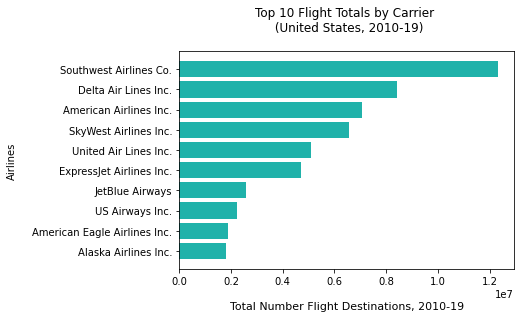

In [65]:
plt.figure(facecolor='white')
plt.barh(most_flights_top10['carrier_del'], most_flights_top10['df_sum_flights'],color='lightseagreen')
plt.gca().invert_yaxis()
plt.ylabel('Airlines', fontsize=10, color='black', rotation=90, labelpad=15)
plt.title('Top 10 Flight Totals by Carrier \n (United States, 2010-19)', fontsize=12, fontname="Times New Roman Bold", color='black', pad=20)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Total Number Flight Destinations, 2010-19', fontsize=11, color='black', rotation=0, labelpad=15)
#plt.axvline(x=67521, color='r', linestyle='-', label=' U.S. Census \n National Household \n Median Income')
#plt.legend(loc = 'upper right')
plt.savefig('Top10_al_most_dest', dpi=200, transparent=True, bbox_inches='tight')
plt.show()

In [66]:
delays.shape

(157056, 21)

In [67]:
delays.dtypes

year_del                 int64
month_del                int64
al_iata_del             object
carrier_del             object
airport_code_del        object
airport_name_del        object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

### Relative proportion of Destination Airports served by each airline on a monthly basis from 2010-2019

In [68]:
text = " ".join(review for review in delays.carrier_del.astype(str))
print ("There are {} words in the combination of all cells in column carrier_del.".format(len(text)))

There are 3356688 words in the combination of all cells in column carrier_del.


In [69]:
stopwords = set(STOPWORDS)

In [70]:
stopwords.update(["Airline", "Airlines", "Airways", "Aviation", "Air", "Lines", "Inc", "International", "LLC"])

In [71]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

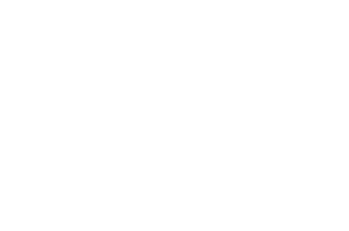

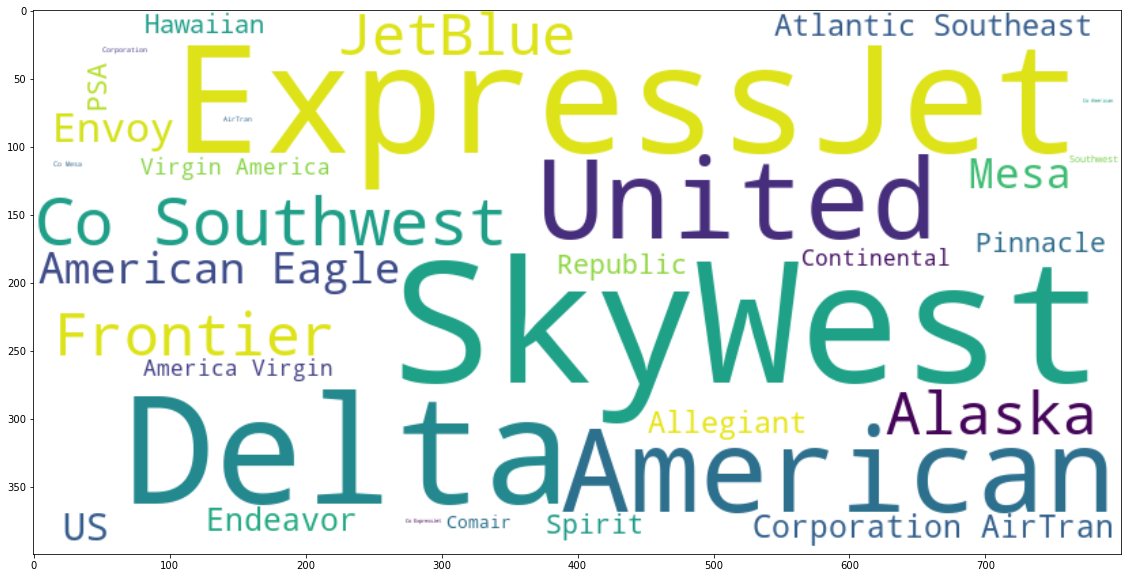

In [72]:
#NOT GOING TO USE ...
plt.axis("off")
plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [73]:
#delays.carrier_del.value_counts()

In [74]:
delays.columns

Index(['year_del', 'month_del', 'al_iata_del', 'carrier_del',
       'airport_code_del', 'airport_name_del', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [75]:
#find sum of all delays for each airport for entire dataset
ap15_all_years = delays.groupby(['airport_code_del'])['arr_del15'].sum().rename_axis('ap_iata').reset_index(name='all_delays').sort_values(by='all_delays', ascending=False)
ap15_all_years.head(30)

ap_iata  all_delays
264     ORD    622421.0
21      ATL    609302.0
97      DFW    459139.0
201     LAX    431393.0
328     SFO    424768.0
96      DEN    407534.0
121     EWR    318372.0
173     IAH    296267.0
210     LGA    272552.0
281     PHX    269958.0
199     LAS    265377.0
46      BOS    259828.0
225     MCO    240860.0
76      CLT    228809.0
191     JFK    227954.0
105     DTW    203241.0
326     SEA    200041.0
249     MSP    199394.0
58      BWI    172564.0
280     PHL    170149.0
129     FLL    162884.0
95      DCA    159878.0
337     SLC    150786.0
227     MDW    150335.0
316     SAN    146239.0
235     MIA    143266.0
360     TPA    130306.0
44      BNA    110373.0
171     IAD    108627.0
347     STL    106502.0

In [76]:
airports.columns

Index(['Airport ID', 'Name_ap', 'City', 'Country_ap', 'IATA_ap', 'ICAO_ap',
       'Lat_ap', 'Long_ap', 'Alt_ap', 'TZone_ap'],
      dtype='object')

In [77]:
ap15_all_years.columns

Index(['ap_iata', 'all_delays'], dtype='object')

In [78]:
ap15_all_years = ap15_all_years.merge(airports, left_on='ap_iata', right_on='IATA_ap', how='left')
ap15_all_years.head(1)

ap_iata  all_delays  Airport ID                               Name_ap  \
0     ORD    622421.0      3830.0  Chicago O'Hare International Airport   

      City     Country_ap IATA_ap ICAO_ap   Lat_ap  Long_ap  Alt_ap TZone_ap  
0  Chicago  United States     ORD    KORD  41.9786 -87.9048   672.0       -6

In [79]:
ap15_all_years.columns

Index(['ap_iata', 'all_delays', 'Airport ID', 'Name_ap', 'City', 'Country_ap',
       'IATA_ap', 'ICAO_ap', 'Lat_ap', 'Long_ap', 'Alt_ap', 'TZone_ap'],
      dtype='object')

In [80]:
ap15_all_years.drop(['Country_ap', 'ICAO_ap', 'Alt_ap', 'TZone_ap'], axis=1, inplace=True)
ap15_all_years.head(1)

ap_iata  all_delays  Airport ID                               Name_ap  \
0     ORD    622421.0      3830.0  Chicago O'Hare International Airport   

      City IATA_ap   Lat_ap  Long_ap  
0  Chicago     ORD  41.9786 -87.9048

In [81]:
ap15_all_years['all_delays'].max()

622421.0

In [82]:
ap15_all_years['all_delays'].min()

0.0

In [83]:
ap15_all_years['all_delays'].mean()

30152.815584415584

In [84]:
ap15_all_years.isna().sum()

ap_iata        0
all_delays     0
Airport ID    12
Name_ap       12
City          12
IATA_ap       12
Lat_ap        12
Long_ap       12
dtype: int64

In [85]:
#drop all na values
ap15_all_years.dropna(subset=['Lat_ap', 'Long_ap'], inplace=True)
ap15_all_years.isna().sum()


ap_iata       0
all_delays    0
Airport ID    0
Name_ap       0
City          0
IATA_ap       0
Lat_ap        0
Long_ap       0
dtype: int64

In [86]:
#sorted all_delays into descending order
ap15_all_years.head(10)

ap_iata  all_delays  Airport ID  \
0     ORD    622421.0      3830.0   
1     ATL    609302.0      3682.0   
2     DFW    459139.0      3670.0   
3     LAX    431393.0      3484.0   
4     SFO    424768.0      3469.0   
5     DEN    407534.0      3751.0   
6     EWR    318372.0      3494.0   
7     IAH    296267.0      3550.0   
8     LGA    272552.0      3697.0   
9     PHX    269958.0      3462.0   

                                            Name_ap               City  \
0              Chicago O'Hare International Airport            Chicago   
1  Hartsfield Jackson Atlanta International Airport            Atlanta   
2           Dallas Fort Worth International Airport  Dallas-Fort Worth   
3                 Los Angeles International Airport        Los Angeles   
4               San Francisco International Airport      San Francisco   
5                      Denver International Airport             Denver   
6              Newark Liberty International Airport             Newark   
7      George Bush Intercontinental Houston Airport            Houston   
8                                La Guardia Airport           New York   
9          Phoenix Sky Harbor International Airport            Phoenix   

  IATA_ap     Lat_ap     Long_ap  
0     ORD  41.978600  -87.904800  
1     ATL  33.636700  -84.428101  
2     DFW  32.896801  -97.038002  
3     LAX  33.942501 -118.407997  
4     SFO  37.618999 -122.375000  
5     DEN  39.861698 -104.672997  
6     EWR  40.692501  -74.168701  
7     IAH  29.984400  -95.341400  
8     LGA  40.777199  -73.872597  
9     PHX  33.434299 -112.012001

In [87]:
#create groups or stages from 0 (min) to 622421 delays
stages = ["600000+", "450001-600000", "350001-450000", "250001-350000", "150001-250000", "100001-150000",
         "100001-150000", "50001-100000", "0-50000"]

In [88]:
# Create tuples of row indexes for the above ranges
tuple1 = (0, ap15_all_years[ap15_all_years.all_delays > 600000].index[-1]+1)
tuple2 = (tuple1[1], ap15_all_years[(ap15_all_years.all_delays > 450001) & (ap15_all_years.all_delays <=600000)].index[-1]+1)
tuple3 = (tuple2[1], ap15_all_years[(ap15_all_years.all_delays > 350001) & (ap15_all_years.all_delays <=450000)].index[-1]+1)
tuple4 = (tuple3[1], ap15_all_years[(ap15_all_years.all_delays > 250001) & (ap15_all_years.all_delays <=350000)].index[-1]+1)
tuple5 = (tuple4[1], ap15_all_years[(ap15_all_years.all_delays > 150001) & (ap15_all_years.all_delays <=250000)].index[-1]+1)
tuple6 = (tuple5[1], ap15_all_years[(ap15_all_years.all_delays > 100001) & (ap15_all_years.all_delays <=150000)].index[-1]+1)
tuple7 = (tuple6[1], ap15_all_years[(ap15_all_years.all_delays > 51001)  & (ap15_all_years.all_delays <=100000)].index[-1]+1)
tuple8 = (tuple7[1], ap15_all_years[(ap15_all_years.all_delays > 25001)  & (ap15_all_years.all_delays <=50000)].index[-1]+1)
tuple9 = (tuple8[1], ap15_all_years[(ap15_all_years.all_delays > 0)      & (ap15_all_years.all_delays <=25000)].index[-1]+1)

limits = [tuple1, tuple2, tuple3, tuple4, tuple5, tuple6, tuple7, tuple8, tuple9]
limits

[(0, 2),
 (2, 3),
 (3, 6),
 (6, 12),
 (12, 24),
 (24, 32),
 (32, 52),
 (52, 77),
 (77, 379)]

In [89]:
colors = ["#08E8DE","#9BDDFF","#87CEEB","#C4C3D0","#97FFFF", "#99BADD", "#E7FEFF", "#F8F8FF", "#CCCCFF"]


In [90]:
fig = go.Figure()
stage_counter = 0
for i in range(len(limits)):
    lim = limits[i]
    df_sub = ap15_all_years[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['Long_ap'],
        lat = df_sub['Lat_ap'],
        text = df_sub['Name_ap'],
        marker = dict(
            size = df_sub['all_delays']*0.002,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{}'.format(stages[stage_counter])))
    stage_counter = stage_counter+1


In [91]:
fig.update_layout(
        title_text = 'Airports with Most Delays, 2010-19',
        title_x=0.5,
        showlegend = True,
        legend_title = 'Number of Delays, 2010-19',
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
            projection=go.layout.geo.Projection(type = 'albers usa'),
        )
    )


In [92]:
#map normalized data ... creating
ap15_all_years.head(1)

ap_iata  all_delays  Airport ID                               Name_ap  \
0     ORD    622421.0      3830.0  Chicago O'Hare International Airport   

      City IATA_ap   Lat_ap  Long_ap  
0  Chicago     ORD  41.9786 -87.9048

In [93]:
delays.head(1)

year_del  month_del al_iata_del               carrier_del airport_code_del  \
0      2019         12          EV  ExpressJet Airlines Inc.              BDL   

                      airport_name_del  arr_flights  arr_del15  carrier_ct  \
0  Hartford, CT: Bradley International         14.0        4.0         2.0   

   weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0         0.0  ...          0.0               2.0            0.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           0.0      114.0           61.0            0.0        0.0   

   security_delay  late_aircraft_delay  
0             0.0                 53.0  

[1 rows x 21 columns]

In [94]:

#find all flights to each airport

ap_arr_all_years = delays.groupby(['airport_code_del'])['arr_flights'].sum().rename_axis('ap_iata').reset_index(name='all_flights').sort_values(by='all_flights', ascending=False)
ap_arr_all_years.head()

ap_iata  all_flights
21      ATL    3881775.0
264     ORD    3028013.0
97      DFW    2586647.0
96      DEN    2317802.0
201     LAX    2161551.0

In [95]:
#join all flights to each airport to all_delays to get normalized dataset
ap15_all_years = ap15_all_years.merge(ap_arr_all_years, left_on='ap_iata', right_on='ap_iata', how='left')
ap15_all_years.head(1)

ap_iata  all_delays  Airport ID                               Name_ap  \
0     ORD    622421.0      3830.0  Chicago O'Hare International Airport   

      City IATA_ap   Lat_ap  Long_ap  all_flights  
0  Chicago     ORD  41.9786 -87.9048    3028013.0

In [96]:
ap15_all_years.columns

Index(['ap_iata', 'all_delays', 'Airport ID', 'Name_ap', 'City', 'IATA_ap',
       'Lat_ap', 'Long_ap', 'all_flights'],
      dtype='object')

In [97]:
#change column order AAAAAAAA
ap15_all_years = ap15_all_years.loc[:, ['ap_iata', 'all_delays', 'all_flights', 'Airport ID', 'Name_ap', 'City', 'IATA_ap',
       'Lat_ap', 'Long_ap']]
ap15_all_years.head(2)

ap_iata  all_delays  all_flights  Airport ID  \
0     ORD    622421.0    3028013.0      3830.0   
1     ATL    609302.0    3881775.0      3682.0   

                                            Name_ap     City IATA_ap   Lat_ap  \
0              Chicago O'Hare International Airport  Chicago     ORD  41.9786   
1  Hartsfield Jackson Atlanta International Airport  Atlanta     ATL  33.6367   

     Long_ap  
0 -87.904800  
1 -84.428101

In [98]:
ap15_all_years['pct_delay'] = ap15_all_years['all_delays'] / ap15_all_years['all_flights']
ap15_all_years.head(1)

ap_iata  all_delays  all_flights  Airport ID  \
0     ORD    622421.0    3028013.0      3830.0   

                                Name_ap     City IATA_ap   Lat_ap  Long_ap  \
0  Chicago O'Hare International Airport  Chicago     ORD  41.9786 -87.9048   

   pct_delay  
0   0.205554

In [99]:
ap15_all_years = ap15_all_years.loc[:, ['ap_iata', 'all_delays', 'all_flights', 'pct_delay', 'Airport ID', 'Name_ap', 'City', 'IATA_ap',
       'Lat_ap', 'Long_ap']]
ap15_all_years

ap_iata  all_delays  all_flights  pct_delay  Airport ID  \
0       ORD    622421.0    3028013.0   0.205554      3830.0   
1       ATL    609302.0    3881775.0   0.156965      3682.0   
2       DFW    459139.0    2586647.0   0.177504      3670.0   
3       LAX    431393.0    2161551.0   0.199576      3484.0   
4       SFO    424768.0    1648150.0   0.257724      3469.0   
..      ...         ...          ...        ...         ...   
368     ENV         0.0          0.0        NaN      3451.0   
369     FNL         0.0          1.0   0.000000      4257.0   
370     MCN         0.0          0.0        NaN      3754.0   
371     EFD         0.0          1.0   0.000000      3572.0   
372     TUP         0.0          1.0   0.000000      5773.0   

                                              Name_ap               City  \
0                Chicago O'Hare International Airport            Chicago   
1    Hartsfield Jackson Atlanta International Airport            Atlanta   
2             Dallas Fort Worth International Airport  Dallas-Fort Worth   
3                   Los Angeles International Airport        Los Angeles   
4                 San Francisco International Airport      San Francisco   
..                                                ...                ...   
368                                  Wendover Airport           Wendover   
369                Northern Colorado Regional Airport       Fort Collins   
370                   Middle Georgia Regional Airport              Macon   
371                                 Ellington Airport            Houston   
372                           Tupelo Regional Airport             Tupelo   

    IATA_ap     Lat_ap     Long_ap  
0       ORD  41.978600  -87.904800  
1       ATL  33.636700  -84.428101  
2       DFW  32.896801  -97.038002  
3       LAX  33.942501 -118.407997  
4       SFO  37.618999 -122.375000  
..      ...        ...         ...  
368     ENV  40.718700 -114.030998  
369     FNL  40.451804 -105.011000  
370     MCN  32.692799  -83.649200  
371     EFD  29.607300  -95.158798  
372     TUP  34.268101  -88.769897  

[373 rows x 10 columns]

In [100]:
ap15_all_years['pct_delay'] = ap15_all_years['pct_delay'].fillna(0)

In [101]:
#sort
ap15_all_years.sort_values(by='pct_delay', ascending=False, inplace=True)
ap15_all_years

ap_iata  all_delays  all_flights  pct_delay  Airport ID  \
367     YNG         2.0          2.0   1.000000      3881.0   
347     FOE       164.0        449.0   0.365256      3843.0   
324     ILG       376.0       1157.0   0.324978      3859.0   
245     CEC      1643.0       5177.0   0.317365      5727.0   
233     OTH      1873.0       5967.0   0.313893      5757.0   
..      ...         ...          ...        ...         ...   
368     ENV         0.0          0.0   0.000000      3451.0   
369     FNL         0.0          1.0   0.000000      4257.0   
370     MCN         0.0          0.0   0.000000      3754.0   
371     EFD         0.0          1.0   0.000000      3572.0   
372     TUP         0.0          1.0   0.000000      5773.0   

                                    Name_ap           City IATA_ap     Lat_ap  \
367      Youngstown Warren Regional Airport     Youngstown     YNG  41.260700   
347  Topeka Regional Airport - Forbes Field         Topeka     FOE  38.950901   
324                      New Castle Airport     Wilmington     ILG  39.678699   
245            Jack Mc Namara Field Airport  Crescent City     CEC  41.780201   
233       Southwest Oregon Regional Airport     North Bend     OTH  43.417099   
..                                      ...            ...     ...        ...   
368                        Wendover Airport       Wendover     ENV  40.718700   
369      Northern Colorado Regional Airport   Fort Collins     FNL  40.451804   
370         Middle Georgia Regional Airport          Macon     MCN  32.692799   
371                       Ellington Airport        Houston     EFD  29.607300   
372                 Tupelo Regional Airport         Tupelo     TUP  34.268101   

        Long_ap  
367  -80.679100  
347  -95.663597  
324  -75.606499  
245 -124.236999  
233 -124.246002  
..          ...  
368 -114.030998  
369 -105.011000  
370  -83.649200  
371  -95.158798  
372  -88.769897  

[373 rows x 10 columns]

In [102]:
ap15_all_years.reset_index(drop=True, inplace=True)

In [103]:
ap15_all_years.head()

ap_iata  all_delays  all_flights  pct_delay  Airport ID  \
0     YNG         2.0          2.0   1.000000      3881.0   
1     FOE       164.0        449.0   0.365256      3843.0   
2     ILG       376.0       1157.0   0.324978      3859.0   
3     CEC      1643.0       5177.0   0.317365      5727.0   
4     OTH      1873.0       5967.0   0.313893      5757.0   

                                  Name_ap           City IATA_ap     Lat_ap  \
0      Youngstown Warren Regional Airport     Youngstown     YNG  41.260700   
1  Topeka Regional Airport - Forbes Field         Topeka     FOE  38.950901   
2                      New Castle Airport     Wilmington     ILG  39.678699   
3            Jack Mc Namara Field Airport  Crescent City     CEC  41.780201   
4       Southwest Oregon Regional Airport     North Bend     OTH  43.417099   

      Long_ap  
0  -80.679100  
1  -95.663597  
2  -75.606499  
3 -124.236999  
4 -124.246002

In [104]:
#begin create normalized map
stages = [".40+", "0.35 - 0.40", "0.30 - 0.35", "0.25 - 0.30", "0.20 - 0.25", "0.17 - 0.20",
         "0.15 - 0.17", "0.10 - 0.15", "0.00-0.10"]

In [105]:
tuple1 = (0, ap15_all_years[ap15_all_years.pct_delay > .40].index[-1]+1)
tuple2 = (tuple1[1], ap15_all_years[(ap15_all_years.pct_delay > .35) & (ap15_all_years.pct_delay <=.40)].index[-1]+1)
tuple3 = (tuple2[1], ap15_all_years[(ap15_all_years.pct_delay > .30) & (ap15_all_years.pct_delay <=.35)].index[-1]+1)
tuple4 = (tuple3[1], ap15_all_years[(ap15_all_years.pct_delay > .25) & (ap15_all_years.pct_delay <=.30)].index[-1]+1)
tuple5 = (tuple4[1], ap15_all_years[(ap15_all_years.pct_delay > .20) & (ap15_all_years.pct_delay <=.25)].index[-1]+1)
tuple6 = (tuple5[1], ap15_all_years[(ap15_all_years.pct_delay > .17) & (ap15_all_years.pct_delay <=.20)].index[-1]+1)
tuple7 = (tuple6[1], ap15_all_years[(ap15_all_years.pct_delay > .15) & (ap15_all_years.pct_delay <=.17)].index[-1]+1)
tuple8 = (tuple7[1], ap15_all_years[(ap15_all_years.pct_delay > .10) & (ap15_all_years.pct_delay <=.15)].index[-1]+1)
tuple9 = (tuple8[1], ap15_all_years[(ap15_all_years.pct_delay > 0)   & (ap15_all_years.pct_delay <=.10)].index[-1]+1)

limits = [tuple1, tuple2, tuple3, tuple4, tuple5, tuple6, tuple7, tuple8, tuple9]
limits

[(0, 1),
 (1, 2),
 (2, 6),
 (6, 18),
 (18, 111),
 (111, 254),
 (254, 296),
 (296, 355),
 (355, 368)]

In [106]:
bins = [0, .10, .15, .17, .20, .25, .30, .35, .40, 1]
labels = ["0-0.10","0.10-0.15","0.15 - 0.17","0.17 - 0.20","0.20 - 0.25", "0.25 - 0.30", "0.30 - 0.35", "0.35 - 0.40", ">0.40"]
ap15_all_years['category'] = pd.cut(ap15_all_years['pct_delay'], bins=bins, labels=labels)
ap15_all_years.head(1)

ap_iata  all_delays  all_flights  pct_delay  Airport ID  \
0     YNG         2.0          2.0        1.0      3881.0   

                              Name_ap        City IATA_ap   Lat_ap  Long_ap  \
0  Youngstown Warren Regional Airport  Youngstown     YNG  41.2607 -80.6791   

  category  
0    >0.40

In [107]:
cat_df = ap15_all_years['category'].value_counts().reset_index()
cat_df

index  category
0  0.17 - 0.20       143
1  0.20 - 0.25        93
2    0.10-0.15        59
3  0.15 - 0.17        42
4       0-0.10        13
5  0.25 - 0.30        12
6  0.30 - 0.35         4
7  0.35 - 0.40         1
8        >0.40         1

In [108]:
cat_df.rename(columns = {'index':'Pct. Category', 'category':'Number of Airports'}, inplace=True)
cat_df

Pct. Category  Number of Airports
0   0.17 - 0.20                 143
1   0.20 - 0.25                  93
2     0.10-0.15                  59
3   0.15 - 0.17                  42
4        0-0.10                  13
5   0.25 - 0.30                  12
6   0.30 - 0.35                   4
7   0.35 - 0.40                   1
8         >0.40                   1

In [109]:
cat_df.sort_values('Pct. Category')

Pct. Category  Number of Airports
4        0-0.10                  13
2     0.10-0.15                  59
3   0.15 - 0.17                  42
0   0.17 - 0.20                 143
1   0.20 - 0.25                  93
5   0.25 - 0.30                  12
6   0.30 - 0.35                   4
7   0.35 - 0.40                   1
8         >0.40                   1

In [110]:
cat_sort = {"0-0.10":0,"0.10-0.15":1,"0.15 - 0.17":2,"0.17 - 0.20":3,"0.20 - 0.25":4, "0.25 - 0.30":5, "0.30 - 0.35":6, "0.35 - 0.40":7, ">0.40":8}
cat_df['order'] = cat_df.index.map(cat_sort)
cat_df

Pct. Category  Number of Airports  order
0   0.17 - 0.20                 143    NaN
1   0.20 - 0.25                  93    NaN
2     0.10-0.15                  59    NaN
3   0.15 - 0.17                  42    NaN
4        0-0.10                  13    NaN
5   0.25 - 0.30                  12    NaN
6   0.30 - 0.35                   4    NaN
7   0.35 - 0.40                   1    NaN
8         >0.40                   1    NaN

In [111]:
ap15_all_years.dtypes

ap_iata          object
all_delays      float64
all_flights     float64
pct_delay       float64
Airport ID      float64
Name_ap          object
City             object
IATA_ap          object
Lat_ap          float64
Long_ap         float64
category       category
dtype: object

In [112]:
colors = ["#6495ED","#CCCCFF","#97FFFF","#CCCCFF","#A1CAF1", "#00FFFF", "#E7FEFF", "#F8F8FF", "#CCCCFF"]




In [113]:
ap15_all_years.head(1)

ap_iata  all_delays  all_flights  pct_delay  Airport ID  \
0     YNG         2.0          2.0        1.0      3881.0   

                              Name_ap        City IATA_ap   Lat_ap  Long_ap  \
0  Youngstown Warren Regional Airport  Youngstown     YNG  41.2607 -80.6791   

  category  
0    >0.40

In [114]:
fig = go.Figure()
stage_counter = 0
for i in range(len(limits)):
    lim = limits[i]
    df_sub = ap15_all_years[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['Long_ap'],
        lat = df_sub['Lat_ap'],
        text = df_sub['Name_ap'],
        marker = dict(
            size = df_sub['pct_delay']*500,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{}'.format(stages[stage_counter])))
    stage_counter = stage_counter+1


In [115]:
fig.update_layout(
        title_text = 'Airport Delays Per Flight, 2010-19',
        title_x=0.5,
        showlegend = True,
        legend_title = 'Percentage Delay, 2010-19',
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
            projection=go.layout.geo.Projection(type = 'albers usa'),
        )
    )


### --------------------------------------------------------------------------------------------------- end delays

### Airplanes

In [116]:
airplanes = pd.read_csv('../Data/airplanes.csv')
airplanes.head()

Name IATA code ICAO code
0                       Aerospatiale (Nord) 262       ND2      N262
1  Aerospatiale (Sud Aviation) Se.210 Caravelle       CRV      S210
2                  Aerospatiale SN.601 Corvette       NDC      S601
3                Aerospatiale/Alenia ATR 42-300       AT4      AT43
4                Aerospatiale/Alenia ATR 42-500       AT5      AT45

In [117]:
airplanes.rename(columns = {'Name':'Plane', 'IATA code':'Plane_IATA','ICAO code':'Plane_ICAO'}, inplace=True)
airplanes.head()

Plane Plane_IATA Plane_ICAO
0                       Aerospatiale (Nord) 262        ND2       N262
1  Aerospatiale (Sud Aviation) Se.210 Caravelle        CRV       S210
2                  Aerospatiale SN.601 Corvette        NDC       S601
3                Aerospatiale/Alenia ATR 42-300        AT4       AT43
4                Aerospatiale/Alenia ATR 42-500        AT5       AT45

In [118]:
airplanes.isnull().sum()

Plane         0
Plane_IATA    0
Plane_ICAO    0
dtype: int64

### -------------------------------------------------------------------------------- end airplanes

### Routes (not helpful b/c of lack of records - use passengers data instead)

In [119]:
routes = pd.read_csv('../Data/routes.csv')
routes.head()

Airline Airline ID Source airport Source airport ID Destination airport  \
0      2B        410            AER              2965                 KZN   
1      2B        410            ASF              2966                 KZN   
2      2B        410            ASF              2966                 MRV   
3      2B        410            CEK              2968                 KZN   
4      2B        410            CEK              2968                 OVB   

  Destination airport ID Codeshare  Stops Equipment  
0                   2990       NaN      0       CR2  
1                   2990       NaN      0       CR2  
2                   2962       NaN      0       CR2  
3                   2990       NaN      0       CR2  
4                   4078       NaN      0       CR2

In [120]:
routes.shape

(67663, 9)

In [121]:
routes.isnull().sum()

Airline                       0
Airline ID                    0
Source airport                0
Source airport ID             0
Destination airport           0
Destination airport ID        0
Codeshare                 53066
Stops                         0
Equipment                    18
dtype: int64

In [122]:
routes.drop('Codeshare', axis=1, inplace=True)
routes.head(1)

Airline Airline ID Source airport Source airport ID Destination airport  \
0      2B        410            AER              2965                 KZN   

  Destination airport ID  Stops Equipment  
0                   2990      0       CR2

In [123]:
routes.rename(columns = {'Airline':'Airline_IATA_r', 'Airline ID':'Airline_ID_r', 'Source airport': 'Source_ap_r', 'Source airport ID': 'Source_ap_ID_r', 'Destination airport': 'Dest_ap_r', 'Destination airport ID': 'Dest_ap_ID_r', 'Stops':'Stops_r','Equipment':'Plane_IATA_r'}, inplace=True)
routes.head(1)

Airline_IATA_r Airline_ID_r Source_ap_r Source_ap_ID_r Dest_ap_r  \
0             2B          410         AER           2965       KZN   

  Dest_ap_ID_r  Stops_r Plane_IATA_r  
0         2990        0          CR2

### ------------------------------------------------------------------------------------------------------------------- end routes

In [124]:
### Finding Number of Carrier Delays by more than 15 minutes
### Join Airlines with Delays

In [125]:
delays.head(2)

year_del  month_del al_iata_del               carrier_del airport_code_del  \
0      2019         12          EV  ExpressJet Airlines Inc.              BDL   
1      2019         12          EV  ExpressJet Airlines Inc.              BGR   

                      airport_name_del  arr_flights  arr_del15  carrier_ct  \
0  Hartford, CT: Bradley International         14.0        4.0        2.00   
1     Bangor, ME: Bangor International         34.0       16.0        4.12   

   weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0         0.0  ...          0.0              2.00            0.0   
1         0.0  ...          0.0              7.98            2.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           0.0      114.0           61.0            0.0        0.0   
1           0.0     1450.0          682.0            0.0      231.0   

   security_delay  late_aircraft_delay  
0             0.0                 53.0  
1             0.0                537.0  

[2 rows x 21 columns]

In [126]:
delays.carrier_del.unique()

array(['ExpressJet Airlines Inc.', 'Frontier Airlines Inc.',
       'Allegiant Air', 'Hawaiian Airlines Inc.', 'Envoy Air',
       'Spirit Air Lines', 'Southwest Airlines Co.', 'Mesa Airlines Inc.',
       'Republic Airline', 'PSA Airlines Inc.', 'SkyWest Airlines Inc.',
       'United Air Lines Inc.', 'Endeavor Air Inc.',
       'American Airlines Inc.', 'Alaska Airlines Inc.',
       'JetBlue Airways', 'Delta Air Lines Inc.', 'Virgin America',
       'US Airways Inc.', 'AirTran Airways Corporation',
       'American Eagle Airlines Inc.', 'Pinnacle Airlines Inc.',
       'Atlantic Southeast Airlines', 'Continental Air Lines Inc.',
       'Comair Inc.'], dtype=object)

In [127]:
delays.columns

Index(['year_del', 'month_del', 'al_iata_del', 'carrier_del',
       'airport_code_del', 'airport_name_del', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [128]:
airlines.Name_al.unique()

array(['Unknown', 'Private flight', '1Time Airline', ...,
       'Jetgo Australia', 'Air Carnival', 'Svyaz Rossiya'], dtype=object)

In [129]:
airlines.head()

AirLine_ID_al           Name_al IATA_al ICAO_al     Country_al Active_al
0              -1           Unknown       -     NaN             \N         Y
1               1    Private flight       -     NaN            NaN         Y
3               3     1Time Airline      1T     RNX   South Africa         Y
10             10       40-Mile Air      Q5     MLA  United States         Y
13             13  Ansett Australia      AN     AAA      Australia         Y

In [130]:
delays.isnull().sum()

year_del                 0
month_del                0
al_iata_del              0
carrier_del              0
airport_code_del         0
airport_name_del         0
arr_flights            162
arr_del15              195
carrier_ct             162
weather_ct             162
nas_ct                 162
security_ct            162
late_aircraft_ct       162
arr_cancelled          162
arr_diverted           162
arr_delay              162
carrier_delay          162
weather_delay          162
nas_delay              162
security_delay         162
late_aircraft_delay    162
dtype: int64

In [131]:
delays.columns

Index(['year_del', 'month_del', 'al_iata_del', 'carrier_del',
       'airport_code_del', 'airport_name_del', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [132]:
airlines.columns

Index(['AirLine_ID_al', 'Name_al', 'IATA_al', 'ICAO_al', 'Country_al',
       'Active_al'],
      dtype='object')

### Merge Airline dataset with Delay dataset

In [133]:
#mergedStuff = pd.merge(df1, df2, on=['Name'], how='inner')
delays_al = delays.merge(airlines, left_on='al_iata_del', right_on='IATA_al', how='left')
delays_al.head(2)

year_del  month_del al_iata_del               carrier_del airport_code_del  \
0      2019         12          EV  ExpressJet Airlines Inc.              BDL   
1      2019         12          EV  ExpressJet Airlines Inc.              BGR   

                      airport_name_del  arr_flights  arr_del15  carrier_ct  \
0  Hartford, CT: Bradley International         14.0        4.0        2.00   
1     Bangor, ME: Bangor International         34.0       16.0        4.12   

   weather_ct  ...  weather_delay  nas_delay  security_delay  \
0         0.0  ...            0.0        0.0             0.0   
1         0.0  ...            0.0      231.0             0.0   

   late_aircraft_delay  AirLine_ID_al                      Name_al  IATA_al  \
0                 53.0            452  Atlantic Southeast Airlines       EV   
1                537.0            452  Atlantic Southeast Airlines       EV   

   ICAO_al     Country_al  Active_al  
0      ASQ  United States          Y  
1      ASQ  United States          Y  

[2 rows x 27 columns]

In [134]:
delays_al.columns

Index(['year_del', 'month_del', 'al_iata_del', 'carrier_del',
       'airport_code_del', 'airport_name_del', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'AirLine_ID_al', 'Name_al', 'IATA_al', 'ICAO_al', 'Country_al',
       'Active_al'],
      dtype='object')

In [135]:
delays_al = delays_al.loc[:, ['year_del', 'month_del', 'al_iata_del', 'carrier_del', 'airport_code_del', 'airport_name_del', 'AirLine_ID_al', 'Name_al', 'IATA_al', 'ICAO_al', 'Country_al', 'Active_al', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct',
       'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled','arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay','nas_delay', 'security_delay', 'late_aircraft_delay']]
delays_al.head(3)

year_del  month_del al_iata_del               carrier_del airport_code_del  \
0      2019         12          EV  ExpressJet Airlines Inc.              BDL   
1      2019         12          EV  ExpressJet Airlines Inc.              BGR   
2      2019         12          EV  ExpressJet Airlines Inc.              BHM   

                                    airport_name_del  AirLine_ID_al  \
0                Hartford, CT: Bradley International            452   
1                   Bangor, ME: Bangor International            452   
2  Birmingham, AL: Birmingham-Shuttlesworth Inter...            452   

                       Name_al IATA_al ICAO_al  ... security_ct  \
0  Atlantic Southeast Airlines      EV     ASQ  ...         0.0   
1  Atlantic Southeast Airlines      EV     ASQ  ...         0.0   
2  Atlantic Southeast Airlines      EV     ASQ  ...         0.0   

  late_aircraft_ct  arr_cancelled  arr_diverted  arr_delay  carrier_delay  \
0             2.00            0.0           0.0      114.0           61.0   
1             7.98            2.0           0.0     1450.0          682.0   
2             2.48            0.0           0.0      572.0          233.0   

   weather_delay  nas_delay  security_delay  late_aircraft_delay  
0            0.0        0.0             0.0                 53.0  
1            0.0      231.0             0.0                537.0  
2            2.0      206.0             0.0                131.0  

[3 rows x 27 columns]

In [136]:
#can also use iterrows
#for x in airlines.itertuples():
#    if x[2].find('ExpressJet') != -1:
#        print(x)

In [137]:
#thinking about joining on airline name after filter but expressjet appears to be the only one with a history of changes in delays data
#express = airlines[airlines['Name'].str.contains('ExpressJet')]
#express.head()

In [138]:
delays_al.columns

Index(['year_del', 'month_del', 'al_iata_del', 'carrier_del',
       'airport_code_del', 'airport_name_del', 'AirLine_ID_al', 'Name_al',
       'IATA_al', 'ICAO_al', 'Country_al', 'Active_al', 'arr_flights',
       'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct',
       'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay'],
      dtype='object')

In [139]:
delays_al_sum = delays_al.groupby(['carrier_del'])['arr_del15'].sum().sort_values(ascending=False).reset_index(name='sum_delays')
delays_al_sum.head(2)

carrier_del  sum_delays
0  Southwest Airlines Co.   2375572.0
1  American Airlines Inc.   1385103.0

In [140]:
sum_arr_air = delays_al.groupby(['carrier_del'])['arr_flights'].sum().sort_values(ascending=False).reset_index(name='sum_arrivals')
sum_arr_air.head(2)

carrier_del  sum_arrivals
0  Southwest Airlines Co.    12333317.0
1    Delta Air Lines Inc.     8410684.0

In [141]:
delays_all_airlines = delays_al_sum.merge(sum_arr_air, left_on='carrier_del', right_on='carrier_del', how='left')
delays_all_airlines.head()

carrier_del  sum_delays  sum_arrivals
0    Southwest Airlines Co.   2375572.0    12333317.0
1    American Airlines Inc.   1385103.0     7080371.0
2      Delta Air Lines Inc.   1230207.0     8410684.0
3     SkyWest Airlines Inc.   1186901.0     6555532.0
4  ExpressJet Airlines Inc.   1000219.0     4714016.0

### -----------------------------------------------------------------------------

### Top/Bottom AIRLINE Delay Percentage from 2010-2019

In [142]:
delays_all_airlines['pct_delay'] = delays_all_airlines['sum_delays'] / delays_all_airlines['sum_arrivals']
delays_all_airlines = delays_all_airlines.sort_values(by='pct_delay', ascending=False)
delays_all_airlines.head(10)

carrier_del  sum_delays  sum_arrivals  pct_delay
6                JetBlue Airways    613442.0     2588526.0   0.236985
11        Frontier Airlines Inc.    224935.0      952354.0   0.236188
24                   Comair Inc.     33739.0      147633.0   0.228533
9                      Envoy Air    258846.0     1210352.0   0.213860
23                 Allegiant Air     42772.0      201526.0   0.212241
4       ExpressJet Airlines Inc.   1000219.0     4714016.0   0.212180
14              Spirit Air Lines    166739.0      793419.0   0.210153
21                Virgin America     79576.0      389060.0   0.204534
7   American Eagle Airlines Inc.    380804.0     1898148.0   0.200619
16   Atlantic Southeast Airlines    129619.0      647766.0   0.200102

In [143]:
delays_all_al_top10 = delays_all_airlines.nlargest(n=10, columns=['pct_delay'])
delays_all_al_top10.head(11)

carrier_del  sum_delays  sum_arrivals  pct_delay
6                JetBlue Airways    613442.0     2588526.0   0.236985
11        Frontier Airlines Inc.    224935.0      952354.0   0.236188
24                   Comair Inc.     33739.0      147633.0   0.228533
9                      Envoy Air    258846.0     1210352.0   0.213860
23                 Allegiant Air     42772.0      201526.0   0.212241
4       ExpressJet Airlines Inc.   1000219.0     4714016.0   0.212180
14              Spirit Air Lines    166739.0      793419.0   0.210153
21                Virgin America     79576.0      389060.0   0.204534
7   American Eagle Airlines Inc.    380804.0     1898148.0   0.200619
16   Atlantic Southeast Airlines    129619.0      647766.0   0.200102

In [144]:
delays_al.year_del.min()

2010

In [145]:
delays_al.year_del.max()

2019

# -----------------------------------------------------------

### Average & Mean Delays for All AIRLINES

In [146]:
#average
delays_all_airlines.sum_delays.sum() / delays_all_airlines.sum_arrivals.sum()

0.18561005370682257

In [147]:
#mean
delays_all_airlines.pct_delay.mean()

0.1885678834051222

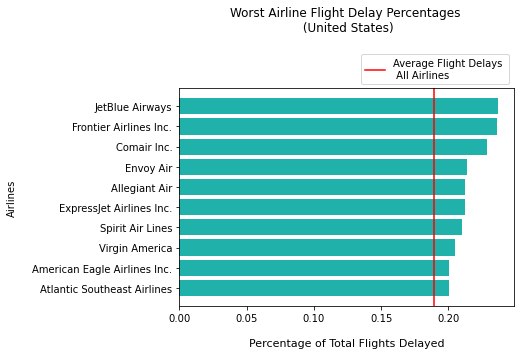

In [148]:
plt.figure(facecolor='white')
plt.barh(delays_all_al_top10['carrier_del'], delays_all_al_top10['pct_delay'],color='lightseagreen')
plt.gca().invert_yaxis()
plt.ylabel('Airlines', fontsize=10, color='black', rotation=90, labelpad=15)
plt.title('Worst Airline Flight Delay Percentages \n (United States)', fontsize=12, fontname="Times New Roman Bold", color='black', pad=57)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Percentage of Total Flights Delayed', fontsize=11, color='black', rotation=0, labelpad=15)
plt.axvline(x=0.189, color='r', linestyle='-', label='Average Flight Delays \n All Airlines')
plt.legend(loc = 'upper right', bbox_to_anchor=(1, 1.18))
plt.savefig('Top10_Delayed_Airlines', dpi=200, transparent=True, bbox_inches='tight')
plt.show()

In [149]:
delays_all_al_bottom10 = delays_all_airlines.nsmallest(n=10, columns=['pct_delay'])
delays_all_al_bottom10.head(11)

carrier_del  sum_delays  sum_arrivals  pct_delay
22       Hawaiian Airlines Inc.     67564.0      756363.0   0.089327
10         Alaska Airlines Inc.    250481.0     1788691.0   0.140036
2          Delta Air Lines Inc.   1230207.0     8410684.0   0.146267
15  AirTran Airways Corporation    148611.0      969156.0   0.153341
8               US Airways Inc.    370891.0     2246049.0   0.165130
19            Endeavor Air Inc.    105408.0      622999.0   0.169194
13           Mesa Airlines Inc.    182474.0     1049018.0   0.173947
3         SkyWest Airlines Inc.   1186901.0     6555532.0   0.181053
17             Republic Airline    118606.0      645239.0   0.183817
20       Pinnacle Airlines Inc.     81394.0      438115.0   0.185782

### --------------------------------------------------------------------------------

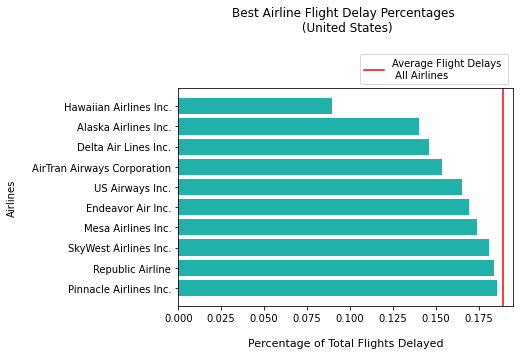

In [150]:
plt.figure(facecolor='white')
plt.barh(delays_all_al_bottom10['carrier_del'], delays_all_al_bottom10['pct_delay'],color='lightseagreen')
plt.gca().invert_yaxis()
plt.ylabel('Airlines', fontsize=10, color='black', rotation=90, labelpad=15)
plt.title('Best Airline Flight Delay Percentages \n (United States)', fontsize=12, fontname="Times New Roman Bold", color='black', pad=57)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Percentage of Total Flights Delayed', fontsize=11, color='black', rotation=0, labelpad=15)
plt.axvline(x=0.189, color='r', linestyle='-', label='Average Flight Delays \n All Airlines')
plt.legend(loc = 'upper right', bbox_to_anchor=(1, 1.18))
plt.savefig('Top10_Delayed_Airlines', dpi=200, transparent=True, bbox_inches='tight')
plt.show()

In [151]:
#finding month of most airline delays of 15 minutes or more
delays_month = delays_al.groupby(['year_del', 'month_del', 'carrier_del','arr_flights', 'arr_del15'])['arr_del15'].sum().sort_values(ascending=False).reset_index(name='sum_delays')
delays_month.head(10)

year_del  month_del             carrier_del  arr_flights  arr_del15  \
0      2013          7    Delta Air Lines Inc.      18649.0     5268.0   
1      2013          6    Delta Air Lines Inc.      18144.0     4395.0   
2      2018          6    Delta Air Lines Inc.      21029.0     4176.0   
3      2014          1    Delta Air Lines Inc.      17071.0     4024.0   
4      2012          9  American Airlines Inc.      12360.0     3919.0   
5      2010          7    Delta Air Lines Inc.      14827.0     3904.0   
6      2018         11    Delta Air Lines Inc.      19820.0     3895.0   
7      2010          6    Delta Air Lines Inc.      14537.0     3835.0   
8      2014          6  American Airlines Inc.      13503.0     3818.0   
9      2019          5  American Airlines Inc.      13392.0     3714.0   

   sum_delays  
0      5268.0  
1      4395.0  
2      4176.0  
3      4024.0  
4      3919.0  
5      3904.0  
6      3895.0  
7      3835.0  
8      3818.0  
9      3714.0

### Merge Passengers with Routes --- Passengers have year & month data

In [152]:
routes.columns

Index(['Airline_IATA_r', 'Airline_ID_r', 'Source_ap_r', 'Source_ap_ID_r',
       'Dest_ap_r', 'Dest_ap_ID_r', 'Stops_r', 'Plane_IATA_r'],
      dtype='object')

In [153]:
routes.dtypes

Airline_IATA_r    object
Airline_ID_r      object
Source_ap_r       object
Source_ap_ID_r    object
Dest_ap_r         object
Dest_ap_ID_r      object
Stops_r            int64
Plane_IATA_r      object
dtype: object

In [154]:
passengers.columns

Index(['year_pass', 'month_pass', 'sum_pass', 'al_id_pass', 'carrier_pass',
       'origin_pass', 'or_city_pass', 'or_abbr_pass', 'or_state_pass',
       'or_country_abbr', 'or_country_pass', 'dest_pass', 'dest_city_pass',
       'dest_state_abbr_pass', 'dest_state_pass', 'dest_country_abbr_pass',
       'dest_country_pass'],
      dtype='object')

In [155]:
passengers.dtypes

year_pass                  int64
month_pass                 int64
sum_pass                   int64
al_id_pass                object
carrier_pass              object
origin_pass               object
or_city_pass              object
or_abbr_pass              object
or_state_pass             object
or_country_abbr           object
or_country_pass           object
dest_pass                 object
dest_city_pass            object
dest_state_abbr_pass      object
dest_state_pass           object
dest_country_abbr_pass    object
dest_country_pass         object
dtype: object

In [156]:
# Joining routes doesn't help mainly because of lack of records, Airline ID is known (airline IATA would be nice),
routes.tail(1)

Airline_IATA_r Airline_ID_r Source_ap_r Source_ap_ID_r Dest_ap_r  \
67662             ZM        19016         OSS           2913       FRU   

      Dest_ap_ID_r  Stops_r Plane_IATA_r  
67662         2912        0          734

In [157]:
passengers.tail(1)

year_pass  month_pass  sum_pass al_id_pass  \
6278580       2020           6         1      22048   

                                      carrier_pass origin_pass or_city_pass  \
6278580  Concierge U Ltd. d/b/a Jet Concierge Club         BOS   Boston, MA   

        or_abbr_pass  or_state_pass or_country_abbr or_country_pass dest_pass  \
6278580           MA  Massachusetts              US   United States       FOK   

          dest_city_pass dest_state_abbr_pass dest_state_pass  \
6278580  Westhampton, NY                   NY        New York   

        dest_country_abbr_pass dest_country_pass  
6278580                     US     United States

In [158]:
#pass_routes = passengers.merge(routes, left_on=['AIRLINE_ID', 'ORIGIN', 'DEST'], right_on=['Airline_ID_r', 'Source_ap_r', 'Dest_ap_r'],  how='left')
#pass_routes.head(2)

In [159]:
passengers.shape

(4892512, 17)

In [160]:
routes.shape

(67663, 8)

In [161]:
### Merge airports with delays to get airport ID

In [162]:
delays.head(1)

year_del  month_del al_iata_del               carrier_del airport_code_del  \
0      2019         12          EV  ExpressJet Airlines Inc.              BDL   

                      airport_name_del  arr_flights  arr_del15  carrier_ct  \
0  Hartford, CT: Bradley International         14.0        4.0         2.0   

   weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0         0.0  ...          0.0               2.0            0.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           0.0      114.0           61.0            0.0        0.0   

   security_delay  late_aircraft_delay  
0             0.0                 53.0  

[1 rows x 21 columns]

In [163]:
airports.head(1)

Airport ID                     Name_ap           City     Country_ap  \
3212        3411  Barter Island LRRS Airport  Barter Island  United States   

     IATA_ap ICAO_ap     Lat_ap     Long_ap  Alt_ap TZone_ap  
3212     BTI    PABA  70.134003 -143.582001       2       -9

In [164]:
delays_ap = delays.merge(airports, left_on=['airport_code_del'], right_on=['IATA_ap'],  how='left')
delays_ap.head(1)

year_del  month_del al_iata_del               carrier_del airport_code_del  \
0      2019         12          EV  ExpressJet Airlines Inc.              BDL   

                      airport_name_del  arr_flights  arr_del15  carrier_ct  \
0  Hartford, CT: Bradley International         14.0        4.0         2.0   

   weather_ct  ...  Airport ID                        Name_ap           City  \
0         0.0  ...      3825.0  Bradley International Airport  Windsor Locks   

      Country_ap  IATA_ap  ICAO_ap   Lat_ap    Long_ap  Alt_ap  TZone_ap  
0  United States      BDL     KBDL  41.9389 -72.683197   173.0        -5  

[1 rows x 31 columns]

In [165]:
delays_ap.columns

Index(['year_del', 'month_del', 'al_iata_del', 'carrier_del',
       'airport_code_del', 'airport_name_del', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'Airport ID', 'Name_ap', 'City', 'Country_ap', 'IATA_ap', 'ICAO_ap',
       'Lat_ap', 'Long_ap', 'Alt_ap', 'TZone_ap'],
      dtype='object')

In [166]:
delays_ap.drop(['ICAO_ap', 'Alt_ap', 'TZone_ap'], axis=1, inplace=True)
delays_ap.head(2)

year_del  month_del al_iata_del               carrier_del airport_code_del  \
0      2019         12          EV  ExpressJet Airlines Inc.              BDL   
1      2019         12          EV  ExpressJet Airlines Inc.              BGR   

                      airport_name_del  arr_flights  arr_del15  carrier_ct  \
0  Hartford, CT: Bradley International         14.0        4.0        2.00   
1     Bangor, ME: Bangor International         34.0       16.0        4.12   

   weather_ct  ...  nas_delay  security_delay  late_aircraft_delay  \
0         0.0  ...        0.0             0.0                 53.0   
1         0.0  ...      231.0             0.0                537.0   

   Airport ID                        Name_ap           City     Country_ap  \
0      3825.0  Bradley International Airport  Windsor Locks  United States   
1      3463.0   Bangor International Airport         Bangor  United States   

   IATA_ap   Lat_ap    Long_ap  
0      BDL  41.9389 -72.683197  
1      BGR  44.8074 -68.828102  

[2 rows x 28 columns]

In [167]:
delays_ap.columns

Index(['year_del', 'month_del', 'al_iata_del', 'carrier_del',
       'airport_code_del', 'airport_name_del', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'Airport ID', 'Name_ap', 'City', 'Country_ap', 'IATA_ap', 'Lat_ap',
       'Long_ap'],
      dtype='object')

In [168]:
delays_ap = delays_ap.loc[:, ['year_del', 'month_del', 'al_iata_del', 'carrier_del',
       'airport_code_del', 'airport_name_del', 'Airport ID', 'Name_ap', 'City', 'Country_ap', 'IATA_ap', 'Lat_ap',
       'Long_ap', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']]
delays_ap.head(1)

year_del  month_del al_iata_del               carrier_del airport_code_del  \
0      2019         12          EV  ExpressJet Airlines Inc.              BDL   

                      airport_name_del  Airport ID  \
0  Hartford, CT: Bradley International      3825.0   

                         Name_ap           City     Country_ap  ...  \
0  Bradley International Airport  Windsor Locks  United States  ...   

  security_ct  late_aircraft_ct  arr_cancelled  arr_diverted  arr_delay  \
0         0.0               2.0            0.0           0.0      114.0   

   carrier_delay  weather_delay  nas_delay  security_delay  \
0           61.0            0.0        0.0             0.0   

   late_aircraft_delay  
0                 53.0  

[1 rows x 28 columns]

In [169]:
#join airlines to delays_ap to get airline id (to match to passengers)

In [170]:
delays_ap.columns

Index(['year_del', 'month_del', 'al_iata_del', 'carrier_del',
       'airport_code_del', 'airport_name_del', 'Airport ID', 'Name_ap', 'City',
       'Country_ap', 'IATA_ap', 'Lat_ap', 'Long_ap', 'arr_flights',
       'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct',
       'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay'],
      dtype='object')

In [171]:
delays_ap.head(1)

year_del  month_del al_iata_del               carrier_del airport_code_del  \
0      2019         12          EV  ExpressJet Airlines Inc.              BDL   

                      airport_name_del  Airport ID  \
0  Hartford, CT: Bradley International      3825.0   

                         Name_ap           City     Country_ap  ...  \
0  Bradley International Airport  Windsor Locks  United States  ...   

  security_ct  late_aircraft_ct  arr_cancelled  arr_diverted  arr_delay  \
0         0.0               2.0            0.0           0.0      114.0   

   carrier_delay  weather_delay  nas_delay  security_delay  \
0           61.0            0.0        0.0             0.0   

   late_aircraft_delay  
0                 53.0  

[1 rows x 28 columns]

In [172]:
airlines.tail(1)

AirLine_ID_al        Name_al IATA_al ICAO_al Country_al Active_al
6161          21317  Svyaz Rossiya      7R     SJM     Russia         Y

In [173]:
delays_ap_al = delays_ap.merge(airlines, left_on=['al_iata_del'], right_on=['IATA_al'],  how='left')
delays_ap_al.head(1)

year_del  month_del al_iata_del               carrier_del airport_code_del  \
0      2019         12          EV  ExpressJet Airlines Inc.              BDL   

                      airport_name_del  Airport ID  \
0  Hartford, CT: Bradley International      3825.0   

                         Name_ap           City     Country_ap  ...  \
0  Bradley International Airport  Windsor Locks  United States  ...   

  weather_delay  nas_delay  security_delay  late_aircraft_delay  \
0           0.0        0.0             0.0                 53.0   

   AirLine_ID_al                      Name_al  IATA_al  ICAO_al  \
0            452  Atlantic Southeast Airlines       EV      ASQ   

      Country_al  Active_al  
0  United States          Y  

[1 rows x 34 columns]

In [174]:
delays_ap_al.columns

Index(['year_del', 'month_del', 'al_iata_del', 'carrier_del',
       'airport_code_del', 'airport_name_del', 'Airport ID', 'Name_ap', 'City',
       'Country_ap', 'IATA_ap', 'Lat_ap', 'Long_ap', 'arr_flights',
       'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct',
       'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'AirLine_ID_al', 'Name_al', 'IATA_al', 'ICAO_al',
       'Country_al', 'Active_al'],
      dtype='object')

In [175]:
delays_ap_al.drop('Name_al', axis=1, inplace=True)
delays_ap_al.drop('ICAO_al', axis=1, inplace=True)
delays_ap_al.drop('Country_al', axis=1, inplace=True)
delays_ap_al.drop('Active_al', axis=1, inplace=True)
delays_ap_al.head(1)

year_del  month_del al_iata_del               carrier_del airport_code_del  \
0      2019         12          EV  ExpressJet Airlines Inc.              BDL   

                      airport_name_del  Airport ID  \
0  Hartford, CT: Bradley International      3825.0   

                         Name_ap           City     Country_ap  ...  \
0  Bradley International Airport  Windsor Locks  United States  ...   

  arr_cancelled  arr_diverted  arr_delay  carrier_delay  weather_delay  \
0           0.0           0.0      114.0           61.0            0.0   

   nas_delay  security_delay  late_aircraft_delay  AirLine_ID_al  IATA_al  
0        0.0             0.0                 53.0            452       EV  

[1 rows x 30 columns]

In [176]:
delays_ap_al.columns

Index(['year_del', 'month_del', 'al_iata_del', 'carrier_del',
       'airport_code_del', 'airport_name_del', 'Airport ID', 'Name_ap', 'City',
       'Country_ap', 'IATA_ap', 'Lat_ap', 'Long_ap', 'arr_flights',
       'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct',
       'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'AirLine_ID_al', 'IATA_al'],
      dtype='object')

In [177]:
delays_ap_al = delays_ap_al.loc[:, ['year_del', 'month_del', 'al_iata_del', 'IATA_al', 'carrier_del',
                                    'AirLine_ID_al', 'airport_code_del', 'airport_name_del', 'Airport ID',
                                    'Name_ap', 'City', 'Country_ap', 'IATA_ap', 'Lat_ap', 'Long_ap', 'arr_flights',
                                    'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct',
                                    'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay',
                                    'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay','late_aircraft_delay']]
delays_ap_al.head(1)

year_del  month_del al_iata_del IATA_al               carrier_del  \
0      2019         12          EV      EV  ExpressJet Airlines Inc.   

   AirLine_ID_al airport_code_del                     airport_name_del  \
0            452              BDL  Hartford, CT: Bradley International   

   Airport ID                        Name_ap  ... security_ct  \
0      3825.0  Bradley International Airport  ...         0.0   

  late_aircraft_ct arr_cancelled  arr_diverted  arr_delay  carrier_delay  \
0              2.0           0.0           0.0      114.0           61.0   

   weather_delay  nas_delay  security_delay  late_aircraft_delay  
0            0.0        0.0             0.0                 53.0  

[1 rows x 30 columns]

In [178]:
delays_ap_al.columns

Index(['year_del', 'month_del', 'al_iata_del', 'IATA_al', 'carrier_del',
       'AirLine_ID_al', 'airport_code_del', 'airport_name_del', 'Airport ID',
       'Name_ap', 'City', 'Country_ap', 'IATA_ap', 'Lat_ap', 'Long_ap',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [179]:
routes.columns

Index(['Airline_IATA_r', 'Airline_ID_r', 'Source_ap_r', 'Source_ap_ID_r',
       'Dest_ap_r', 'Dest_ap_ID_r', 'Stops_r', 'Plane_IATA_r'],
      dtype='object')

In [180]:
# not using id ... lots of bogus values an nans
#a = routes['Airline_ID_r'] = pd.to_numeric(routes['Airline_ID_r'], errors='coerce').isna().values.sum()

#b = routes['Dest_ap_ID_r'] = pd.to_numeric(routes['Dest_ap_ID_r'], errors='coerce').isna().values.sum()
#b
#routes['Dest_ap_ID_r'] = pd.to_numeric(routes['Dest_ap_ID_r'], errors='coerce')

In [181]:
routes.fillna(0)

Airline_IATA_r Airline_ID_r Source_ap_r Source_ap_ID_r Dest_ap_r  \
0                 2B          410         AER           2965       KZN   
1                 2B          410         ASF           2966       KZN   
2                 2B          410         ASF           2966       MRV   
3                 2B          410         CEK           2968       KZN   
4                 2B          410         CEK           2968       OVB   
...              ...          ...         ...            ...       ...   
67658             ZL         4178         WYA           6334       ADL   
67659             ZM        19016         DME           4029       FRU   
67660             ZM        19016         FRU           2912       DME   
67661             ZM        19016         FRU           2912       OSS   
67662             ZM        19016         OSS           2913       FRU   

      Dest_ap_ID_r  Stops_r Plane_IATA_r  
0             2990        0          CR2  
1             2990        0          CR2  
2             2962        0          CR2  
3             2990        0          CR2  
4             4078        0          CR2  
...            ...      ...          ...  
67658         3341        0          SF3  
67659         2912        0          734  
67660         4029        0          734  
67661         2913        0          734  
67662         2912        0          734  

[67663 rows x 8 columns]

In [182]:
#routes = routes.astype({'Dest_ap_ID_r':'float64'})

In [183]:
passengers.columns

Index(['year_pass', 'month_pass', 'sum_pass', 'al_id_pass', 'carrier_pass',
       'origin_pass', 'or_city_pass', 'or_abbr_pass', 'or_state_pass',
       'or_country_abbr', 'or_country_pass', 'dest_pass', 'dest_city_pass',
       'dest_state_abbr_pass', 'dest_state_pass', 'dest_country_abbr_pass',
       'dest_country_pass'],
      dtype='object')

In [184]:
#dl=passengers[passengers['carrier_pass'].isin(['DL'])]
#dl

In [185]:
passengers.tail(1)

year_pass  month_pass  sum_pass al_id_pass  \
6278580       2020           6         1      22048   

                                      carrier_pass origin_pass or_city_pass  \
6278580  Concierge U Ltd. d/b/a Jet Concierge Club         BOS   Boston, MA   

        or_abbr_pass  or_state_pass or_country_abbr or_country_pass dest_pass  \
6278580           MA  Massachusetts              US   United States       FOK   

          dest_city_pass dest_state_abbr_pass dest_state_pass  \
6278580  Westhampton, NY                   NY        New York   

        dest_country_abbr_pass dest_country_pass  
6278580                     US     United States

In [186]:
passengers.carrier_pass.unique()

array([nan, 'Reeve Aleutian Airways Inc.', 'Northwest Airlines Inc.',
       'Southwest Airlines Co.', 'Air Canada',
       'Compagnie Natl Air France', 'Finnair Oy', 'British Airways Plc',
       'British West Indian Airways', 'China Airlines Ltd.',
       'Japan Air Lines Co. Ltd.', 'Klm Royal Dutch Airlines',
       'Polynesian Airlines Ltd.', 'Singapore Airlines Ltd.',
       'Tap-Portuguese Airlines', 'Heavylift Cargo Airlines Lt',
       'Saudi Arabian Airlines Corp', 'Air Sunshine Inc.',
       'Trans-Air-Link Corporation', 'Aloha Airlines Inc.',
       'Virgin Atlantic Airways', 'Horizon Air', 'Hawaiian Airlines Inc.',
       'Continental Air Lines Inc.', 'Delta Air Lines Inc.',
       'American Airlines Inc.', 'Turk Hava Yollari A.O.',
       'Nippon Cargo Airlines', 'Bradley Air Services Ltd.',
       'Air Transport International', 'Emery Worldwide Airlines',
       'Cayman Airways Limited', 'United Parcel Service',
       'Alaska Airlines Inc.', 'Air New Zealand', 'United Ai

In [187]:
delays.columns

Index(['year_del', 'month_del', 'al_iata_del', 'carrier_del',
       'airport_code_del', 'airport_name_del', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [188]:
delays.carrier_del.unique()

array(['ExpressJet Airlines Inc.', 'Frontier Airlines Inc.',
       'Allegiant Air', 'Hawaiian Airlines Inc.', 'Envoy Air',
       'Spirit Air Lines', 'Southwest Airlines Co.', 'Mesa Airlines Inc.',
       'Republic Airline', 'PSA Airlines Inc.', 'SkyWest Airlines Inc.',
       'United Air Lines Inc.', 'Endeavor Air Inc.',
       'American Airlines Inc.', 'Alaska Airlines Inc.',
       'JetBlue Airways', 'Delta Air Lines Inc.', 'Virgin America',
       'US Airways Inc.', 'AirTran Airways Corporation',
       'American Eagle Airlines Inc.', 'Pinnacle Airlines Inc.',
       'Atlantic Southeast Airlines', 'Continental Air Lines Inc.',
       'Comair Inc.'], dtype=object)

In [189]:
al_dict_code = {'ExpressJet Airlines Inc.' : 'EV' , 'Frontier Airlines Inc.' : 'F9',
       'Allegiant Air' : 'G4', 'Hawaiian Airlines Inc.' : 'HA', 'Envoy Air' : 'MQ',
       'Spirit Air Lines' : 'NK', 'Southwest Airlines Co.' : 'WN', 'Mesa Airlines Inc.' : 'YV',
       'Republic Airline' : 'YX', 'PSA Airlines Inc.' : 'OH', 'SkyWest Airlines Inc.' : 'OO',
       'United Air Lines Inc.' : 'UA', 'Endeavor Air Inc.' : '9E',
       'American Airlines Inc.' : 'AA', 'Alaska Airlines Inc.' : 'AS',
       'JetBlue Airways' : 'B6', 'Delta Air Lines Inc.' : 'DL', 'Virgin America' : 'VX',
       'US Airways Inc.' : 'US', 'AirTran Airways Corporation' : 'FL',
       'American Eagle Airlines Inc.' : 'MQ', 'Pinnacle Airlines Inc.' : '9E',
       'Atlantic Southeast Airlines' : 'EV', 'Continental Air Lines Inc.' : 'CO',
       'Comair Inc.' : 'OH'}

In [190]:
# add airline iata code to passenger data
passengers.tail(1)

year_pass  month_pass  sum_pass al_id_pass  \
6278580       2020           6         1      22048   

                                      carrier_pass origin_pass or_city_pass  \
6278580  Concierge U Ltd. d/b/a Jet Concierge Club         BOS   Boston, MA   

        or_abbr_pass  or_state_pass or_country_abbr or_country_pass dest_pass  \
6278580           MA  Massachusetts              US   United States       FOK   

          dest_city_pass dest_state_abbr_pass dest_state_pass  \
6278580  Westhampton, NY                   NY        New York   

        dest_country_abbr_pass dest_country_pass  
6278580                     US     United States

In [191]:
passengers['al_iata_pass'] = passengers['carrier_pass'].map(al_dict_code)

In [192]:
passengers.head(1)

year_pass  month_pass  sum_pass al_id_pass carrier_pass origin_pass  \
0       2015           3         0          0          NaN         AEX   

     or_city_pass or_abbr_pass or_state_pass or_country_abbr or_country_pass  \
0  Alexandria, LA           LA     Louisiana              US   United States   

  dest_pass  dest_city_pass dest_state_abbr_pass dest_state_pass  \
0       AEX  Alexandria, LA                   LA       Louisiana   

  dest_country_abbr_pass dest_country_pass al_iata_pass  
0                     US     United States          NaN

In [193]:
delays_ap_al.head(1)

year_del  month_del al_iata_del IATA_al               carrier_del  \
0      2019         12          EV      EV  ExpressJet Airlines Inc.   

   AirLine_ID_al airport_code_del                     airport_name_del  \
0            452              BDL  Hartford, CT: Bradley International   

   Airport ID                        Name_ap  ... security_ct  \
0      3825.0  Bradley International Airport  ...         0.0   

  late_aircraft_ct arr_cancelled  arr_diverted  arr_delay  carrier_delay  \
0              2.0           0.0           0.0      114.0           61.0   

   weather_delay  nas_delay  security_delay  late_aircraft_delay  
0            0.0        0.0             0.0                 53.0  

[1 rows x 30 columns]

In [194]:
routes.head(1)

Airline_IATA_r Airline_ID_r Source_ap_r Source_ap_ID_r Dest_ap_r  \
0             2B          410         AER           2965       KZN   

  Dest_ap_ID_r  Stops_r Plane_IATA_r  
0         2990        0          CR2

In [195]:
passengers.tail(1)

year_pass  month_pass  sum_pass al_id_pass  \
6278580       2020           6         1      22048   

                                      carrier_pass origin_pass or_city_pass  \
6278580  Concierge U Ltd. d/b/a Jet Concierge Club         BOS   Boston, MA   

        or_abbr_pass  or_state_pass or_country_abbr or_country_pass dest_pass  \
6278580           MA  Massachusetts              US   United States       FOK   

          dest_city_pass dest_state_abbr_pass dest_state_pass  \
6278580  Westhampton, NY                   NY        New York   

        dest_country_abbr_pass dest_country_pass al_iata_pass  
6278580                     US     United States          NaN

In [196]:
routes.head()

Airline_IATA_r Airline_ID_r Source_ap_r Source_ap_ID_r Dest_ap_r  \
0             2B          410         AER           2965       KZN   
1             2B          410         ASF           2966       KZN   
2             2B          410         ASF           2966       MRV   
3             2B          410         CEK           2968       KZN   
4             2B          410         CEK           2968       OVB   

  Dest_ap_ID_r  Stops_r Plane_IATA_r  
0         2990        0          CR2  
1         2990        0          CR2  
2         2962        0          CR2  
3         2990        0          CR2  
4         4078        0          CR2

In [197]:
#routes will add plane to passenger data

In [198]:
routes.dtypes

Airline_IATA_r    object
Airline_ID_r      object
Source_ap_r       object
Source_ap_ID_r    object
Dest_ap_r         object
Dest_ap_ID_r      object
Stops_r            int64
Plane_IATA_r      object
dtype: object

In [199]:
passengers.dtypes

year_pass                  int64
month_pass                 int64
sum_pass                   int64
al_id_pass                object
carrier_pass              object
origin_pass               object
or_city_pass              object
or_abbr_pass              object
or_state_pass             object
or_country_abbr           object
or_country_pass           object
dest_pass                 object
dest_city_pass            object
dest_state_abbr_pass      object
dest_state_pass           object
dest_country_abbr_pass    object
dest_country_pass         object
al_iata_pass              object
dtype: object

In [200]:
#join routes to passengers JUST to get airplane data

In [201]:
#subset to just US, 2010-19, and just the airlines listed in delays

In [202]:
passengers = passengers[(passengers['year_pass'] > 2009) & (passengers['year_pass'] < 2020)]

In [203]:
passengers = passengers[(passengers['al_iata_pass'] == 'EV') | (passengers['al_iata_pass'] == 'EV') | (passengers['al_iata_pass'] == 'F9') |
                        (passengers['al_iata_pass'] == 'G4') | (passengers['al_iata_pass'] == 'HA') | (passengers['al_iata_pass'] == 'MQ') |
                        (passengers['al_iata_pass'] == 'NK') | (passengers['al_iata_pass'] == 'WN') | (passengers['al_iata_pass'] == 'YV') |
                        (passengers['al_iata_pass'] == 'YX') | (passengers['al_iata_pass'] == 'OH') | (passengers['al_iata_pass'] == 'OO') |
                        (passengers['al_iata_pass'] == 'UA') | (passengers['al_iata_pass'] == '9E') | (passengers['al_iata_pass'] == 'AA') |
                        (passengers['al_iata_pass'] == 'AS') | (passengers['al_iata_pass'] == 'B6') | (passengers['al_iata_pass'] == 'DL') |
                        (passengers['al_iata_pass'] == 'VX') | (passengers['al_iata_pass'] == 'US') | (passengers['al_iata_pass'] == 'FL') |
                        (passengers['al_iata_pass'] == 'MQ') | (passengers['al_iata_pass'] == '9E') | (passengers['al_iata_pass'] == 'EV') |
                        (passengers['al_iata_pass'] == 'CO') | (passengers['al_iata_pass'] == 'OH')]

In [204]:
passengers.head(1)

year_pass  month_pass  sum_pass al_id_pass            carrier_pass  \
139233       2016           6        60      19393  Southwest Airlines Co.   

       origin_pass or_city_pass or_abbr_pass or_state_pass or_country_abbr  \
139233         ABI  Abilene, TX           TX         Texas              US   

       or_country_pass dest_pass      dest_city_pass dest_state_abbr_pass  \
139233   United States       MAF  Midland/Odessa, TX                   TX   

       dest_state_pass dest_country_abbr_pass dest_country_pass al_iata_pass  
139233           Texas                     US     United States           WN

In [205]:
m = sorted(passengers.dest_pass.unique())
m_df = pd.DataFrame(m, columns =['dest_pass_iata'], dtype = str)
m_df

dest_pass_iata
0              ABE
1              ABI
2              ABQ
3              ABR
4              ABY
..             ...
542            YAK
543            YIP
544            YKM
545            YNG
546            YUM

[547 rows x 1 columns]

In [206]:
n = sorted(delays_ap_al.airport_code_del.unique())
n_df = pd.DataFrame(m, columns =['delays_al_iata'], dtype = str)
n_df

delays_al_iata
0              ABE
1              ABI
2              ABQ
3              ABR
4              ABY
..             ...
542            YAK
543            YIP
544            YKM
545            YNG
546            YUM

[547 rows x 1 columns]

In [207]:
#same destination ap list

In [208]:
al_dict_code = {'ExpressJet Airlines Inc.' : 'EV' , 'Frontier Airlines Inc.' : 'F9',
       'Allegiant Air' : 'G4', 'Hawaiian Airlines Inc.' : 'HA', 'Envoy Air' : 'MQ',
       'Spirit Air Lines' : 'NK', 'Southwest Airlines Co.' : 'WN', 'Mesa Airlines Inc.' : 'YV',
       'Republic Airline' : 'YX', 'PSA Airlines Inc.' : 'OH', 'SkyWest Airlines Inc.' : 'OO',
       'United Air Lines Inc.' : 'UA', 'Endeavor Air Inc.' : '9E',
       'American Airlines Inc.' : 'AA', 'Alaska Airlines Inc.' : 'AS',
       'JetBlue Airways' : 'B6', 'Delta Air Lines Inc.' : 'DL', 'Virgin America' : 'VX',
       'US Airways Inc.' : 'US', 'AirTran Airways Corporation' : 'FL',
       'American Eagle Airlines Inc.' : 'MQ', 'Pinnacle Airlines Inc.' : '9E',
       'Atlantic Southeast Airlines' : 'EV', 'Continental Air Lines Inc.' : 'CO',
       'Comair Inc.' : 'OH'}

In [209]:
routes.head()

Airline_IATA_r Airline_ID_r Source_ap_r Source_ap_ID_r Dest_ap_r  \
0             2B          410         AER           2965       KZN   
1             2B          410         ASF           2966       KZN   
2             2B          410         ASF           2966       MRV   
3             2B          410         CEK           2968       KZN   
4             2B          410         CEK           2968       OVB   

  Dest_ap_ID_r  Stops_r Plane_IATA_r  
0         2990        0          CR2  
1         2990        0          CR2  
2         2962        0          CR2  
3         2990        0          CR2  
4         4078        0          CR2

In [210]:
routes[(routes['Airline_IATA_r'] == 'DL')]

Airline_IATA_r Airline_ID_r Source_ap_r Source_ap_ID_r Dest_ap_r  \
20009             DL         2009         ABE           4355       ATL   
20010             DL         2009         ABE           4355       DTW   
20011             DL         2009         ABQ           4019       ATL   
20012             DL         2009         ABQ           4019       MSP   
20013             DL         2009         ABQ           4019       SLC   
...              ...          ...         ...            ...       ...   
21985             DL         2009         YYZ            193       LAS   
21986             DL         2009         YYZ            193       LGA   
21987             DL         2009         YYZ            193       MCO   
21988             DL         2009         YYZ            193       MSP   
21989             DL         2009         ZRH           1678       ATL   

      Dest_ap_ID_r  Stops_r Plane_IATA_r  
20009         3682        0          717  
20010         3645        0          CRJ  
20011         3682        0      757 320  
20012         3858        0          320  
20013         3536        0      CR9 CR7  
...            ...      ...          ...  
21985         3877        0          73H  
21986         3697        0      736 73W  
21987         3878        0      73H 73W  
21988         3858        0          CRJ  
21989         3682        0          76W  

[1981 rows x 8 columns]

In [211]:
routes[(routes['Airline_IATA_r'] == 'DL') & (routes['Source_ap_r'] == 'ABE') & (routes['Dest_ap_r'] == 'ATL')]

Airline_IATA_r Airline_ID_r Source_ap_r Source_ap_ID_r Dest_ap_r  \
20009             DL         2009         ABE           4355       ATL   

      Dest_ap_ID_r  Stops_r Plane_IATA_r  
20009         3682        0          717

In [212]:
passengers[(passengers['al_iata_pass'] == 'DL') & (passengers['origin_pass'] == 'ABE') & (passengers['dest_pass'] == 'ATL')]

year_pass  month_pass  sum_pass al_id_pass          carrier_pass  \
1200805       2010           6      2554      19790  Delta Air Lines Inc.   
1200806       2010           7      3914      19790  Delta Air Lines Inc.   
1200807       2010           8      3683      19790  Delta Air Lines Inc.   
1200808       2010           9       721      19790  Delta Air Lines Inc.   
1200809       2014           4      2257      19790  Delta Air Lines Inc.   
...            ...         ...       ...        ...                   ...   
1200872       2019           8      2890      19790  Delta Air Lines Inc.   
1200873       2019           9      2292      19790  Delta Air Lines Inc.   
1200874       2019          10      2875      19790  Delta Air Lines Inc.   
1200875       2019          11      2566      19790  Delta Air Lines Inc.   
1200876       2019          12      2039      19790  Delta Air Lines Inc.   

        origin_pass                    or_city_pass or_abbr_pass  \
1200805         ABE  Allentown/Bethlehem/Easton, PA           PA   
1200806         ABE  Allentown/Bethlehem/Easton, PA           PA   
1200807         ABE  Allentown/Bethlehem/Easton, PA           PA   
1200808         ABE  Allentown/Bethlehem/Easton, PA           PA   
1200809         ABE  Allentown/Bethlehem/Easton, PA           PA   
...             ...                             ...          ...   
1200872         ABE  Allentown/Bethlehem/Easton, PA           PA   
1200873         ABE  Allentown/Bethlehem/Easton, PA           PA   
1200874         ABE  Allentown/Bethlehem/Easton, PA           PA   
1200875         ABE  Allentown/Bethlehem/Easton, PA           PA   
1200876         ABE  Allentown/Bethlehem/Easton, PA           PA   

        or_state_pass or_country_abbr or_country_pass dest_pass  \
1200805  Pennsylvania              US   United States       ATL   
1200806  Pennsylvania              US   United States       ATL   
1200807  Pennsylvania              US   United States       ATL   
1200808  Pennsylvania              US   United States       ATL   
1200809  Pennsylvania              US   United States       ATL   
...               ...             ...             ...       ...   
1200872  Pennsylvania              US   United States       ATL   
1200873  Pennsylvania              US   United States       ATL   
1200874  Pennsylvania              US   United States       ATL   
1200875  Pennsylvania              US   United States       ATL   
1200876  Pennsylvania              US   United States       ATL   

        dest_city_pass dest_state_abbr_pass dest_state_pass  \
1200805    Atlanta, GA                   GA         Georgia   
1200806    Atlanta, GA                   GA         Georgia   
1200807    Atlanta, GA                   GA         Georgia   
1200808    Atlanta, GA                   GA         Georgia   
1200809    Atlanta, GA                   GA         Georgia   
...                ...                  ...             ...   
1200872    Atlanta, GA                   GA         Georgia   
1200873    Atlanta, GA                   GA         Georgia   
1200874    Atlanta, GA                   GA         Georgia   
1200875    Atlanta, GA                   GA         Georgia   
1200876    Atlanta, GA                   GA         Georgia   

        dest_country_abbr_pass dest_country_pass al_iata_pass  
1200805                     US     United States           DL  
1200806                     US     United States           DL  
1200807                     US     United States           DL  
1200808                     US     United States           DL  
1200809                     US     United States           DL  
...                        ...               ...          ...  
1200872                     US     United States           DL  
1200873                     US     United States           DL  
1200874                     US     United States           DL  
1200875                     US     United States           DL  
1

In [213]:
passengers_routes = passengers.merge(routes, left_on=['al_iata_pass', 'origin_pass', 'dest_pass'], right_on=['Airline_IATA_r', 'Source_ap_r', 'Dest_ap_r'], how='left')

In [214]:
passengers_routes.head(3)

year_pass  month_pass  sum_pass al_id_pass            carrier_pass  \
0       2016           6        60      19393  Southwest Airlines Co.   
1       2012           3       121      19393  Southwest Airlines Co.   
2       2010           8        27      19393  Southwest Airlines Co.   

  origin_pass     or_city_pass or_abbr_pass or_state_pass or_country_abbr  \
0         ABI      Abilene, TX           TX         Texas              US   
1         ABQ  Albuquerque, NM           NM    New Mexico              US   
2         ABQ  Albuquerque, NM           NM    New Mexico              US   

   ... dest_country_pass al_iata_pass Airline_IATA_r Airline_ID_r Source_ap_r  \
0  ...     United States           WN            NaN          NaN         NaN   
1  ...     United States           WN            NaN          NaN         NaN   
2  ...     United States           WN            NaN          NaN         NaN   

  Source_ap_ID_r Dest_ap_r Dest_ap_ID_r Stops_r Plane_IATA_r  
0            NaN       NaN          NaN     NaN          NaN  
1            NaN       NaN          NaN     NaN          NaN  
2            NaN       NaN          NaN     NaN          NaN  

[3 rows x 26 columns]

In [215]:
passengers_routes[(passengers_routes['al_iata_pass'] == 'DL') & (passengers_routes['origin_pass'] == 'ABE') & (passengers_routes['dest_pass'] == 'ATL')]

year_pass  month_pass  sum_pass al_id_pass          carrier_pass  \
386655       2010           6      2554      19790  Delta Air Lines Inc.   
386656       2010           7      3914      19790  Delta Air Lines Inc.   
386657       2010           8      3683      19790  Delta Air Lines Inc.   
386658       2010           9       721      19790  Delta Air Lines Inc.   
386659       2014           4      2257      19790  Delta Air Lines Inc.   
...           ...         ...       ...        ...                   ...   
386722       2019           8      2890      19790  Delta Air Lines Inc.   
386723       2019           9      2292      19790  Delta Air Lines Inc.   
386724       2019          10      2875      19790  Delta Air Lines Inc.   
386725       2019          11      2566      19790  Delta Air Lines Inc.   
386726       2019          12      2039      19790  Delta Air Lines Inc.   

       origin_pass                    or_city_pass or_abbr_pass or_state_pass  \
386655         ABE  Allentown/Bethlehem/Easton, PA           PA  Pennsylvania   
386656         ABE  Allentown/Bethlehem/Easton, PA           PA  Pennsylvania   
386657         ABE  Allentown/Bethlehem/Easton, PA           PA  Pennsylvania   
386658         ABE  Allentown/Bethlehem/Easton, PA           PA  Pennsylvania   
386659         ABE  Allentown/Bethlehem/Easton, PA           PA  Pennsylvania   
...            ...                             ...          ...           ...   
386722         ABE  Allentown/Bethlehem/Easton, PA           PA  Pennsylvania   
386723         ABE  Allentown/Bethlehem/Easton, PA           PA  Pennsylvania   
386724         ABE  Allentown/Bethlehem/Easton, PA           PA  Pennsylvania   
386725         ABE  Allentown/Bethlehem/Easton, PA           PA  Pennsylvania   
386726         ABE  Allentown/Bethlehem/Easton, PA           PA  Pennsylvania   

       or_country_abbr  ... dest_country_pass al_iata_pass Airline_IATA_r  \
386655              US  ...     United States           DL             DL   
386656              US  ...     United States           DL             DL   
386657              US  ...     United States           DL             DL   
386658              US  ...     United States           DL             DL   
386659              US  ...     United States           DL             DL   
...                ...  ...               ...          ...            ...   
386722              US  ...     United States           DL             DL   
386723              US  ...     United States           DL             DL   
386724              US  ...     United States           DL             DL   
386725              US  ...     United States           DL             DL   
386726              US  ...     United States           DL             DL   

       Airline_ID_r Source_ap_r Source_ap_ID_r Dest_ap_r Dest_ap_ID_r Stops_r  \
386655         2009         ABE           4355       ATL         3682     0.0   
386656         2009         ABE           4355       ATL         3682     0.0   
386657         2009         ABE           4355       ATL         3682     0.0   
386658         2009         ABE           4355       ATL         3682     0.0   
386659         2009         ABE           4355       ATL         3682     0.0   
...             ...         ...            ...       ...          ...     ...   
386722         2009         ABE           4355       ATL         3682     0.0   
386723         2009         ABE           4355       ATL         3682     0.0   
386724         2009         ABE           4355       ATL         3682     0.0   
386725         2009         ABE           4355       ATL         3682     0.0   
386726         2009         ABE           4355       ATL         3682     0.0   

       Plane_IATA_r  
386655          717  
386656          717  
386657          717  
386658          717  
386659          717  
...             ...  
386722          717  
386723          717  
386724          717  
3867

In [216]:
passengers_routes = passengers_routes.loc[:, ['year_pass', 'month_pass', 'Dest_ap_r', 'Airline_IATA_r', 'origin_pass',
        'sum_pass', 'al_id_pass', 'carrier_pass', 'or_city_pass', 'or_abbr_pass', 'or_state_pass',
       'or_country_abbr', 'or_country_pass', 'dest_pass', 'dest_city_pass', 'dest_state_abbr_pass', 'dest_state_pass', 
        'dest_country_abbr_pass', 'dest_country_pass', 'al_iata_pass', 'Airline_ID_r', 'Source_ap_r', 'Source_ap_ID_r',
        'Dest_ap_ID_r', 'Stops_r', 'Plane_IATA_r']]

In [217]:
passengers_routes.tail(1)

year_pass  month_pass Dest_ap_r Airline_IATA_r origin_pass  sum_pass  \
1487753       2010           5       NaN            NaN         SNA      7807   

        al_id_pass    carrier_pass   or_city_pass or_abbr_pass  ...  \
1487753      21171  Virgin America  Santa Ana, CA           CA  ...   

        dest_state_pass dest_country_abbr_pass dest_country_pass al_iata_pass  \
1487753      California                     US     United States           VX   

        Airline_ID_r Source_ap_r Source_ap_ID_r Dest_ap_ID_r Stops_r  \
1487753          NaN         NaN            NaN          NaN     NaN   

        Plane_IATA_r  
1487753          NaN  

[1 rows x 26 columns]

In [218]:
passengers_routes.iloc[500]

year_pass                                   2011
month_pass                                    12
Dest_ap_r                                    NaN
Airline_IATA_r                               NaN
origin_pass                                  ABQ
sum_pass                                     295
al_id_pass                                 19393
carrier_pass              Southwest Airlines Co.
or_city_pass                     Albuquerque, NM
or_abbr_pass                                  NM
or_state_pass                         New Mexico
or_country_abbr                               US
or_country_pass                    United States
dest_pass                                    BOI
dest_city_pass                         Boise, ID
dest_state_abbr_pass                          ID
dest_state_pass                            Idaho
dest_country_abbr_pass                        US
dest_country_pass                  United States
al_iata_pass                                  WN
Airline_ID_r        

In [219]:
airplanes.head(1)

Plane Plane_IATA Plane_ICAO
0  Aerospatiale (Nord) 262        ND2       N262

In [220]:
passengers_routes = passengers_routes.merge(airplanes, left_on=['Plane_IATA_r'], right_on=['Plane_IATA'], how='left')
passengers_routes.head(1)

year_pass  month_pass Dest_ap_r Airline_IATA_r origin_pass  sum_pass  \
0       2016           6       NaN            NaN         ABI        60   

  al_id_pass            carrier_pass or_city_pass or_abbr_pass  ...  \
0      19393  Southwest Airlines Co.  Abilene, TX           TX  ...   

  al_iata_pass Airline_ID_r Source_ap_r Source_ap_ID_r Dest_ap_ID_r Stops_r  \
0           WN          NaN         NaN            NaN          NaN     NaN   

  Plane_IATA_r Plane Plane_IATA Plane_ICAO  
0          NaN   NaN        NaN        NaN  

[1 rows x 29 columns]

In [221]:
month_pass_sum = passengers_routes.groupby(['year_pass', 'month_pass', 'Airline_IATA_r', 'Plane_IATA_r', 'Plane', 'carrier_pass', 'dest_pass'])['sum_pass'].sum().sort_values(ascending=False).reset_index()
month_pass_sum

#most_flights = delays.groupby(['carrier_del'])['arr_flights'].sum().sort_values(ascending=False).reset_index(name='df_sum_flights')

year_pass  month_pass Airline_IATA_r Plane_IATA_r  \
0           2017           8             AA          738   
1           2016           8             AA          738   
2           2016           6             AA          738   
3           2016           7             AA          738   
4           2015           8             AA          738   
...          ...         ...            ...          ...   
74947       2012           5             UA          SF3   
74948       2015           8             UA          738   
74949       2015           8             UA          320   
74950       2015           8             UA          319   
74951       2012           5             UA          CR7   

                           Plane            carrier_pass dest_pass  sum_pass  
0                 Boeing 737-800  American Airlines Inc.       ORD    307635  
1                 Boeing 737-800  American Airlines Inc.       ORD    307318  
2                 Boeing 737-800  American Airlines Inc.       ORD    306639  
3                 Boeing 737-800  American Airlines Inc.       ORD    303482  
4                 Boeing 737-800  American Airlines Inc.       ORD    295510  
...                          ...                     ...       ...       ...  
74947              Saab SF340A/B   United Air Lines Inc.       MCO         0  
74948             Boeing 737-800   United Air Lines Inc.       CLE         0  
74949                Airbus A320   United Air Lines Inc.       PBI         0  
74950                Airbus A319   United Air Lines Inc.       IAD         0  
74951  Canadair Regional Jet 700   United Air Lines Inc.       MIA         0  

[74952 rows x 8 columns]

In [222]:
#for visualizing passengers_routes df
#pass_route_group = passengers_routes.sort_values(['year_pass', 'month_pass', 'Dest_ap_r', 'Airline_IATA_r'], ascending=True).groupby(['year_pass', 'month_pass', 'Dest_ap_r', 'Airline_IATA_r'])
#pass_route_group.head()

In [223]:
yr_mo_al_ap = passengers_routes.groupby(['year_pass', 'month_pass', 'Airline_IATA_r', 'Dest_ap_r'])['Dest_ap_r'].count()
yr_mo_al_ap.head()


year_pass  month_pass  Airline_IATA_r  Dest_ap_r
2010       1           9E              ATL          1
                                       SYR          1
                                       TYS          1
                       AA              ABQ          1
                                       ATL          4
Name: Dest_ap_r, dtype: int64

In [224]:
delays_ap_al.head(1)

year_del  month_del al_iata_del IATA_al               carrier_del  \
0      2019         12          EV      EV  ExpressJet Airlines Inc.   

   AirLine_ID_al airport_code_del                     airport_name_del  \
0            452              BDL  Hartford, CT: Bradley International   

   Airport ID                        Name_ap  ... security_ct  \
0      3825.0  Bradley International Airport  ...         0.0   

  late_aircraft_ct arr_cancelled  arr_diverted  arr_delay  carrier_delay  \
0              2.0           0.0           0.0      114.0           61.0   

   weather_delay  nas_delay  security_delay  late_aircraft_delay  
0            0.0        0.0             0.0                 53.0  

[1 rows x 30 columns]

In [225]:
#join month_pass_sum to delays_ap_al

In [226]:
delays_ap_al.columns

Index(['year_del', 'month_del', 'al_iata_del', 'IATA_al', 'carrier_del',
       'AirLine_ID_al', 'airport_code_del', 'airport_name_del', 'Airport ID',
       'Name_ap', 'City', 'Country_ap', 'IATA_ap', 'Lat_ap', 'Long_ap',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [227]:
month_pass_sum.columns

Index(['year_pass', 'month_pass', 'Airline_IATA_r', 'Plane_IATA_r', 'Plane',
       'carrier_pass', 'dest_pass', 'sum_pass'],
      dtype='object')

In [228]:
delays_ap_al.head(1)

year_del  month_del al_iata_del IATA_al               carrier_del  \
0      2019         12          EV      EV  ExpressJet Airlines Inc.   

   AirLine_ID_al airport_code_del                     airport_name_del  \
0            452              BDL  Hartford, CT: Bradley International   

   Airport ID                        Name_ap  ... security_ct  \
0      3825.0  Bradley International Airport  ...         0.0   

  late_aircraft_ct arr_cancelled  arr_diverted  arr_delay  carrier_delay  \
0              2.0           0.0           0.0      114.0           61.0   

   weather_delay  nas_delay  security_delay  late_aircraft_delay  
0            0.0        0.0             0.0                 53.0  

[1 rows x 30 columns]

In [229]:
month_pass_sum.head(1)

year_pass  month_pass Airline_IATA_r Plane_IATA_r           Plane  \
0       2017           8             AA          738  Boeing 737-800   

             carrier_pass dest_pass  sum_pass  
0  American Airlines Inc.       ORD    307635

In [230]:
all_flights = delays_ap_al.merge(month_pass_sum, left_on=['year_del', 'month_del', 'al_iata_del', 'airport_code_del'], right_on=['year_pass', 'month_pass','Airline_IATA_r', 'dest_pass'], how='left')
all_flights.head(3)


year_del  month_del al_iata_del IATA_al               carrier_del  \
0      2019         12          EV      EV  ExpressJet Airlines Inc.   
1      2019         12          EV      EV  ExpressJet Airlines Inc.   
2      2019         12          EV      EV  ExpressJet Airlines Inc.   

   AirLine_ID_al airport_code_del  \
0            452              BDL   
1            452              BGR   
2            452              BHM   

                                    airport_name_del  Airport ID  \
0                Hartford, CT: Bradley International      3825.0   
1                   Bangor, ME: Bangor International      3463.0   
2  Birmingham, AL: Birmingham-Shuttlesworth Inter...      3811.0   

                                          Name_ap  ... security_delay  \
0                   Bradley International Airport  ...            0.0   
1                    Bangor International Airport  ...            0.0   
2  Birmingham-Shuttlesworth International Airport  ...            0.0   

  late_aircraft_delay year_pass  month_pass  Airline_IATA_r  Plane_IATA_r  \
0                53.0       NaN         NaN             NaN           NaN   
1               537.0       NaN         NaN             NaN           NaN   
2               131.0       NaN         NaN             NaN           NaN   

   Plane  carrier_pass  dest_pass  sum_pass  
0    NaN           NaN        NaN       NaN  
1    NaN           NaN        NaN       NaN  
2    NaN           NaN        NaN       NaN  

[3 rows x 38 columns]

In [231]:
all_flights.sum_pass.sum()

930712666.0

### ALL FLIGHTS BELOW

In [232]:
all_flights.columns

Index(['year_del', 'month_del', 'al_iata_del', 'IATA_al', 'carrier_del',
       'AirLine_ID_al', 'airport_code_del', 'airport_name_del', 'Airport ID',
       'Name_ap', 'City', 'Country_ap', 'IATA_ap', 'Lat_ap', 'Long_ap',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'year_pass', 'month_pass',
       'Airline_IATA_r', 'Plane_IATA_r', 'Plane', 'carrier_pass', 'dest_pass',
       'sum_pass'],
      dtype='object')

In [233]:
#scatter plot delays by year with passengers as size
delays_year_pass = all_flights.groupby(['year_pass'])['arr_del15'].sum().sort_values(ascending=False).reset_index()
delays_year_pass


year_pass  arr_del15
0     2019.0  2055248.0
1     2018.0  1930553.0
2     2017.0  1739152.0
3     2016.0  1650646.0
4     2015.0  1649363.0
5     2014.0  1621901.0
6     2013.0  1524632.0
7     2012.0  1298663.0
8     2010.0  1283553.0
9     2011.0  1219252.0

In [234]:
pass_year = all_flights.groupby(['year_pass', 'arr_del15'])['sum_pass'].sum().sort_values(ascending=False).reset_index()
pass_year


year_pass  arr_del15   sum_pass
0        2014.0        9.0  1006766.0
1        2012.0       13.0   878996.0
2        2012.0       14.0   866324.0
3        2012.0        9.0   835194.0
4        2014.0       10.0   834928.0
...         ...        ...        ...
6178     2013.0      290.0        0.0
6179     2015.0      257.0        0.0
6180     2018.0      238.0        0.0
6181     2012.0      200.0        0.0
6182     2012.0      235.0        0.0

[6183 rows x 3 columns]

In [235]:
#rename
pass_year.rename(columns = {'year_pass':'year_pass', 'arr_del15':'del_15','sum_pass':'sum_pass'}, inplace=True)


In [236]:
delays_year_pass = delays_year_pass.merge(pass_year, left_on=['year_pass'], right_on=['year_pass'], how='left')
delays_year_pass

year_pass  arr_del15  del_15  sum_pass
0        2019.0  2055248.0   307.0  695538.0
1        2019.0  2055248.0    85.0  659815.0
2        2019.0  2055248.0     7.0  631955.0
3        2019.0  2055248.0    15.0  593548.0
4        2019.0  2055248.0    17.0  573324.0
...         ...        ...     ...       ...
6178     2011.0  1219252.0   495.0    1924.0
6179     2011.0  1219252.0   297.0     706.0
6180     2011.0  1219252.0   126.0     560.0
6181     2011.0  1219252.0   190.0       4.0
6182     2011.0  1219252.0   272.0       3.0

[6183 rows x 4 columns]

In [237]:
delays_year_pass = delays_year_pass.astype({'year_pass':'int'})
delays_year_pass = delays_year_pass.astype({'arr_del15':'int'})
delays_year_pass = delays_year_pass.astype({'del_15':'int'})
delays_year_pass = delays_year_pass.astype({'sum_pass':'int'})
delays_year_pass.head(1)


year_pass  arr_del15  del_15  sum_pass
0       2019    2055248     307    695538

<Figure size 1008x576 with 0 Axes>

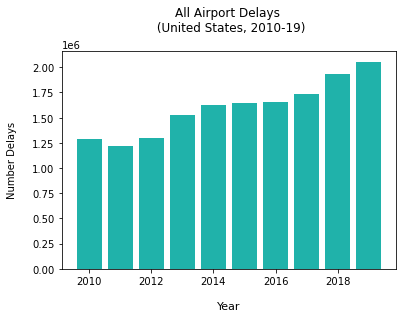

In [238]:

fig = plt.figure(figsize = (14,8))
plt.figure(facecolor='white')
#plt.scatter(delays_year_pass['year_pass'], delays_year_pass['arr_del15'], s=delays_year_pass['sum_pass']*.0001, alpha=.5)



plt.bar(delays_year_pass['year_pass'], delays_year_pass['arr_del15'], color='lightseagreen')
#plt.gca().invert_yaxis()
plt.ylabel('Number Delays', fontsize=10, color='black', rotation=90, labelpad=15)
plt.title('All Airport Delays \n (United States, 2010-19)', fontsize=12, fontname="Times New Roman Bold", color='black', pad=20)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Year', fontsize=11, color='black', rotation=0, labelpad=15)
#plt.axvline(x=67521, color='r', linestyle='-', label=' U.S. Census \n National Household \n Median Income')
#plt.legend(loc = 'upper right')
plt.savefig('total_delays_by_year', dpi=200, transparent=True, bbox_inches='tight')
plt.show()

In [239]:
text = " ".join(review for review in all_flights.Plane.astype(str))
print ("There are {} words in the combination of all cells in column carrier_del.".format(len(text)))

There are 1484076 words in the combination of all cells in column carrier_del.


In [240]:
stopwords = set(STOPWORDS)

In [241]:
stopwords.update([ "NAN", 'nan'])

In [242]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

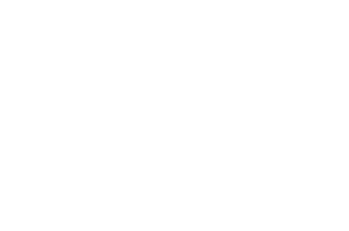

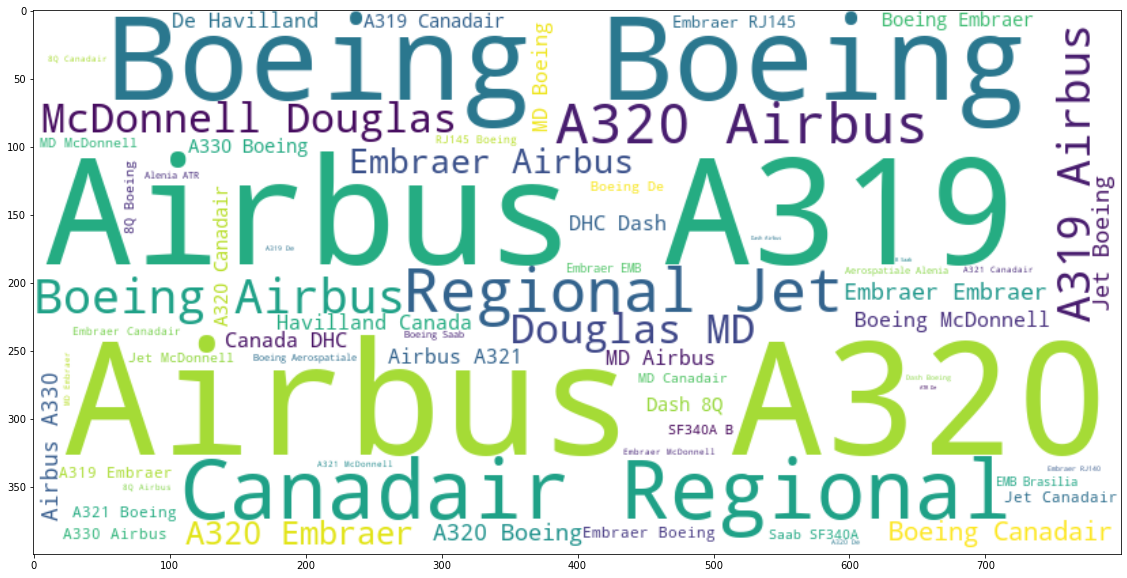

In [243]:
plt.axis("off")
plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [244]:
all_flights['carrier_ct_pct_all_flights'] = (all_flights['carrier_ct'] / all_flights['arr_flights']) * 100
all_flights.iloc[0]

year_del                                                     2019
month_del                                                      12
al_iata_del                                                    EV
IATA_al                                                        EV
carrier_del                              ExpressJet Airlines Inc.
AirLine_ID_al                                                 452
airport_code_del                                              BDL
airport_name_del              Hartford, CT: Bradley International
Airport ID                                                 3825.0
Name_ap                             Bradley International Airport
City                                                Windsor Locks
Country_ap                                          United States
IATA_ap                                                       BDL
Lat_ap                                                    41.9389
Long_ap                                                -72.683197
arr_flight

In [245]:
top_avg_carrier_del = all_flights.groupby(['carrier_del'])['carrier_ct_pct_all_flights'].mean().sort_values(ascending=False).reset_index()
top_avg_carrier_del = top_avg_carrier_del.nlargest(n=10, columns=['carrier_ct_pct_all_flights'])
top_avg_carrier_del.rename(columns = {'carrier_del':'Carrier', 'carrier_ct_pct_all_flights': '% Flights Delayed by Carrier'}, inplace = True)
top_avg_carrier_del


Carrier  % Flights Delayed by Carrier
0       Hawaiian Airlines Inc.                     12.262990
1                  Comair Inc.                      9.811508
2  Atlantic Southeast Airlines                      9.262717
3              JetBlue Airways                      8.626001
4       American Airlines Inc.                      7.845073
5     ExpressJet Airlines Inc.                      7.718019
6       Pinnacle Airlines Inc.                      7.507279
7           Mesa Airlines Inc.                      7.270939
8       Southwest Airlines Co.                      7.059788
9       Frontier Airlines Inc.                      6.987014

In [246]:
#get percent of all flights


<Figure size 1008x576 with 0 Axes>

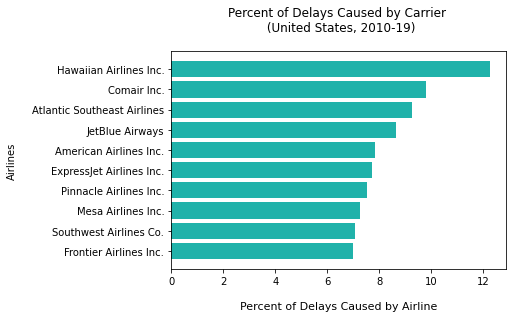

In [247]:
fig = plt.figure(figsize = (14,8))
plt.figure(facecolor='white')
#plt.scatter(delays_year_pass['year_pass'], delays_year_pass['arr_del15'], s=delays_year_pass['sum_pass']*.0001, alpha=.5)



plt.barh(top_avg_carrier_del['Carrier'], top_avg_carrier_del['% Flights Delayed by Carrier'], color='lightseagreen')
plt.gca().invert_yaxis()
plt.ylabel('Airlines', fontsize=10, color='black', rotation=90, labelpad=15)
plt.title('Percent of Delays Caused by Carrier \n (United States, 2010-19)', fontsize=12, fontname="Times New Roman Bold", color='black', pad=20)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Percent of Delays Caused by Airline', fontsize=11, color='black', rotation=0, labelpad=15)
#plt.axvline(x=67521, color='r', linestyle='-', label=' U.S. Census \n National Household \n Median Income')
#plt.legend(loc = 'upper right')
plt.savefig('top_carrier_ct_pct_delays', dpi=200, transparent=True, bbox_inches='tight')
plt.show()

In [248]:
all_flights['weather_ct_pct_all_flights'] = (all_flights['weather_ct'] / all_flights['arr_flights'])*100
all_flights.iloc[0]

year_del                                                     2019
month_del                                                      12
al_iata_del                                                    EV
IATA_al                                                        EV
carrier_del                              ExpressJet Airlines Inc.
AirLine_ID_al                                                 452
airport_code_del                                              BDL
airport_name_del              Hartford, CT: Bradley International
Airport ID                                                 3825.0
Name_ap                             Bradley International Airport
City                                                Windsor Locks
Country_ap                                          United States
IATA_ap                                                       BDL
Lat_ap                                                    41.9389
Long_ap                                                -72.683197
arr_flight

In [249]:
#all_flights.drop('carrier_ct_%del', axis=1, inplace=True)
#all_flights.drop('carrier_ct_pct_delay', axis=1, inplace=True)

In [250]:
all_flights.iloc[2]

year_del                                                                   2019
month_del                                                                    12
al_iata_del                                                                  EV
IATA_al                                                                      EV
carrier_del                                            ExpressJet Airlines Inc.
AirLine_ID_al                                                               452
airport_code_del                                                            BHM
airport_name_del              Birmingham, AL: Birmingham-Shuttlesworth Inter...
Airport ID                                                               3811.0
Name_ap                          Birmingham-Shuttlesworth International Airport
City                                                                 Birmingham
Country_ap                                                        United States
IATA_ap                                 

In [251]:
# % of delays that were caused by weather
all_flights.columns

Index(['year_del', 'month_del', 'al_iata_del', 'IATA_al', 'carrier_del',
       'AirLine_ID_al', 'airport_code_del', 'airport_name_del', 'Airport ID',
       'Name_ap', 'City', 'Country_ap', 'IATA_ap', 'Lat_ap', 'Long_ap',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'year_pass', 'month_pass',
       'Airline_IATA_r', 'Plane_IATA_r', 'Plane', 'carrier_pass', 'dest_pass',
       'sum_pass', 'carrier_ct_pct_all_flights', 'weather_ct_pct_all_flights'],
      dtype='object')

In [252]:
pct_weather_del = (all_flights['weather_ct'].sum() / all_flights['arr_flights'].sum())*100
pct_weather_del

0.5358298535639463

In [253]:
#airports most effected by weather
top_ap_weather_del = all_flights.groupby(['Name_ap'])['weather_ct_pct_all_flights'].mean().sort_values(ascending=False).reset_index()
top_ap_weather_del = top_ap_weather_del.nlargest(n=10, columns=['weather_ct_pct_all_flights'])
#top_avg_carrier_del.rename(columns = {'carrier_del':'Carrier', 'carrier_ct_pct_all_flights': '% Flights Delayed by Carrier'}, inplace = True)
top_ap_weather_del

Name_ap  weather_ct_pct_all_flights
0             Watertown International Airport                    3.415411
1  Hagerstown Regional Richard A Henson Field                    2.704418
2      University of Illinois Willard Airport                    2.527108
3                Sawyer International Airport                    2.404545
4            Sioux Gateway Col. Bud Day Field                    2.173148
5                    Dubuque Regional Airport                    2.073507
6                         Hilton Head Airport                    2.019832
7                   Waterloo Regional Airport                    1.981607
8                    Abilene Regional Airport                    1.842545
9                              Kodiak Airport                    1.819053

In [254]:
#extract state from airport_name_del
all_flights['ap_state'] = all_flights['airport_name_del'].str.extract(r'^.*?, ([A-Z]{2})', expand=True)

#Birmingham, AL:
all_flights.iloc[1]                                                                

year_del                                                  2019
month_del                                                   12
al_iata_del                                                 EV
IATA_al                                                     EV
carrier_del                           ExpressJet Airlines Inc.
AirLine_ID_al                                              452
airport_code_del                                           BGR
airport_name_del              Bangor, ME: Bangor International
Airport ID                                              3463.0
Name_ap                           Bangor International Airport
City                                                    Bangor
Country_ap                                       United States
IATA_ap                                                    BGR
Lat_ap                                                 44.8074
Long_ap                                             -68.828102
arr_flights                                            

In [255]:
region_dict = {'AK':'Alaskan',
              'IA':'Central', 'KS':'Central', 'MO':'Central', 'NE':'Central',
              'DC':'Eastern', 'DE':'Eastern', 'MD':'Eastern', 'NJ':'Eastern', 'NY':'Eastern', 'PA':'Eastern', 'VA':'Eastern', 'WV':'Eastern',
              'IL':'Great Lakes', 'IN':'Great Lakes', 'MI':'Great Lakes', 'MN':'Great Lakes', 'ND':'Great Lakes', 'OH':'Great Lakes', 'SD':'Great Lakes', 'WI':'Great Lakes',
              'CT':'New England', 'MA':'New England', 'ME':'New England', 'NH':'New England', 'RI':'New England', 'VT':'New England',
              'CO':'Northwest Mountain', 'ID':'Northwest Mountain', 'MT':'Northwest Mountain', 'OR':'Northwest Mountain', 'UT':'Northwest Mountain', 'WA':'Northwest Mountain', 'WY':'Northwest Mountain',
              'AL':'Southern','FL':'Southern', 'GA':'Southern', 'KY':'Southern', 'MS':'Southern', 'NC':'Southern', 'PR':'Southern', 'SC':'Southern', 'TN':'Southern', 'VI':'Southern',
              'AR':'Southwest', 'LA':'Southwest', 'NM':'Southwest', 'OK':'Southwest', 'TX':'Southwest',
              'AZ':'Western Pacific', 'CA':'Western Pacific', 'HI':'Western Pacific', 'NV':'Western Pacific', 'AS':'Western Pacific', 'GU':'Western Pacific', 'MH':'Western Pacific'}

In [256]:
#map to column

In [257]:
all_flights['region'] = all_flights['ap_state'].map(region_dict)

In [258]:
all_flights.iloc[1000]

year_del                                                                   2019
month_del                                                                    12
al_iata_del                                                                  OO
IATA_al                                                                      OO
carrier_del                                               SkyWest Airlines Inc.
AirLine_ID_al                                                              4738
airport_code_del                                                            FAY
airport_name_del              Fayetteville, NC: Fayetteville Regional/Granni...
Airport ID                                                               5738.0
Name_ap                                     Fayetteville Regional Grannis Field
City                                                               Fayetteville
Country_ap                                                        United States
IATA_ap                                 

In [259]:
all_flights['pct_nas_del'] = (all_flights['nas_ct'] / all_flights['arr_flights'])*100

In [260]:
all_flights['pct_security_del'] = (all_flights['security_ct'] / all_flights['arr_flights'])*100

In [261]:
all_flights['pct_late_del'] = (all_flights['late_aircraft_ct'] / all_flights['arr_flights'])*100

In [262]:
all_flights['min_per_del15'] = (all_flights['arr_delay'] / all_flights['arr_del15'])

In [263]:
all_flights['min_per_carrier_del'] = (all_flights['carrier_delay'] / all_flights['carrier_ct'])

In [264]:
all_flights['min_per_weather_del'] = (all_flights['weather_delay'] / all_flights['weather_ct'])

In [265]:
all_flights['min_per_nas_del'] = (all_flights['nas_delay'] / all_flights['nas_ct'])

In [266]:
all_flights['min_per_security_del'] = (all_flights['security_delay'] / all_flights['security_ct'])

In [267]:
all_flights['min_per_late_del'] = (all_flights['late_aircraft_delay'] / all_flights['late_aircraft_ct'])

In [268]:
all_flights.iloc[1000]

year_del                                                                   2019
month_del                                                                    12
al_iata_del                                                                  OO
IATA_al                                                                      OO
carrier_del                                               SkyWest Airlines Inc.
AirLine_ID_al                                                              4738
airport_code_del                                                            FAY
airport_name_del              Fayetteville, NC: Fayetteville Regional/Granni...
Airport ID                                                               5738.0
Name_ap                                     Fayetteville Regional Grannis Field
City                                                               Fayetteville
Country_ap                                                        United States
IATA_ap                                 

In [269]:
all_flights.columns

Index(['year_del', 'month_del', 'al_iata_del', 'IATA_al', 'carrier_del',
       'AirLine_ID_al', 'airport_code_del', 'airport_name_del', 'Airport ID',
       'Name_ap', 'City', 'Country_ap', 'IATA_ap', 'Lat_ap', 'Long_ap',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'year_pass', 'month_pass',
       'Airline_IATA_r', 'Plane_IATA_r', 'Plane', 'carrier_pass', 'dest_pass',
       'sum_pass', 'carrier_ct_pct_all_flights', 'weather_ct_pct_all_flights',
       'ap_state', 'region', 'pct_nas_del', 'pct_security_del', 'pct_late_del',
       'min_per_del15', 'min_per_carrier_del', 'min_per_weather_del',
       'min_per_nas_del', 'min_per_security_del', 'min_per_late_del'],
      dtype='object')

In [270]:
all_flights = all_flights.loc[:, ['year_del', 'month_del',
                                  'IATA_ap', 'Lat_ap', 'Long_ap',
                                  'arr_flights', 'arr_del15', 'arr_delay', 'min_per_del15',
                                  'arr_cancelled', 
                                  'arr_diverted',
                                  'carrier_ct', 'carrier_ct_pct_all_flights', 'carrier_delay', 'min_per_carrier_del',
                                  'weather_ct', 'weather_ct_pct_all_flights', 'weather_delay', 'min_per_weather_del',
                                  'nas_ct', 'pct_nas_del', 'nas_delay', 'min_per_nas_del',
                                  'security_ct', 'pct_security_del', 'security_delay', 'min_per_security_del',
                                  'late_aircraft_ct',  'pct_late_del', 'late_aircraft_delay', 'min_per_late_del',
                                  'al_iata_del', 'carrier_del', 
                                  'airport_code_del', 'airport_name_del', 'Name_ap', 
                                  'City', 'ap_state', 'region', 'Country_ap',
                                  'sum_pass',
                                  'Plane_IATA_r', 'Plane',
                                  'year_pass', 'month_pass','Airline_IATA_r',  'carrier_pass', 'dest_pass','IATA_al',
                                  'AirLine_ID_al', 'Airport ID',
                                 ]]

In [271]:
all_flights.iloc[1]

year_del                                                  2019
month_del                                                   12
IATA_ap                                                    BGR
Lat_ap                                                 44.8074
Long_ap                                             -68.828102
arr_flights                                               34.0
arr_del15                                                 16.0
arr_delay                                               1450.0
min_per_del15                                           90.625
arr_cancelled                                              2.0
arr_diverted                                               0.0
carrier_ct                                                4.12
carrier_ct_pct_all_flights                           12.117647
carrier_delay                                            682.0
min_per_carrier_del                                 165.533981
weather_ct                                             

In [272]:
all_flights['arr_del15_ct_pct_all_flights'] = (all_flights['arr_del15'] / all_flights['arr_flights'])*100

In [273]:
all_flights['pct_arr_cancelled'] = (all_flights['arr_cancelled'] / all_flights['arr_flights'])*100

In [274]:
all_flights['pct_arr_diverted'] = (all_flights['arr_diverted'] / all_flights['arr_flights'])*100

In [275]:
all_flights = all_flights.loc[:, ['year_del', 'month_del',
                                  'airport_code_del', 'airport_name_del', 'Name_ap', 'Lat_ap', 'Long_ap',
                                  'al_iata_del', 'carrier_del', 'City', 'ap_state', 'region', 'Country_ap',
                                  'arr_flights',
                                  'arr_cancelled', 'pct_arr_cancelled',
                                  'arr_diverted', 'pct_arr_diverted',
                                  'arr_del15','arr_del15_ct_pct_all_flights', 'arr_delay', 'min_per_del15',
                                  'carrier_ct', 'carrier_ct_pct_all_flights', 'carrier_delay', 'min_per_carrier_del',
                                  'weather_ct', 'weather_ct_pct_all_flights', 'weather_delay', 'min_per_weather_del',
                                  'nas_ct', 'pct_nas_del', 'nas_delay', 'min_per_nas_del',
                                  'security_ct', 'pct_security_del', 'security_delay', 'min_per_security_del',
                                  'late_aircraft_ct',  'pct_late_del', 'late_aircraft_delay', 'min_per_late_del',
                                  'sum_pass',
                                  'Plane_IATA_r', 'Plane',
                                  'year_pass', 'month_pass','Airline_IATA_r',  'carrier_pass', 'dest_pass','IATA_al',
                                  'AirLine_ID_al', 'Airport ID', 'IATA_ap', 
                                 ]]

In [276]:
all_flights.iloc[0]

year_del                                                       2019
month_del                                                        12
airport_code_del                                                BDL
airport_name_del                Hartford, CT: Bradley International
Name_ap                               Bradley International Airport
Lat_ap                                                      41.9389
Long_ap                                                  -72.683197
al_iata_del                                                      EV
carrier_del                                ExpressJet Airlines Inc.
City                                                  Windsor Locks
ap_state                                                         CT
region                                                  New England
Country_ap                                            United States
arr_flights                                                    14.0
arr_cancelled                                   

In [277]:
all_flights.columns

Index(['year_del', 'month_del', 'airport_code_del', 'airport_name_del',
       'Name_ap', 'Lat_ap', 'Long_ap', 'al_iata_del', 'carrier_del', 'City',
       'ap_state', 'region', 'Country_ap', 'arr_flights', 'arr_cancelled',
       'pct_arr_cancelled', 'arr_diverted', 'pct_arr_diverted', 'arr_del15',
       'arr_del15_ct_pct_all_flights', 'arr_delay', 'min_per_del15',
       'carrier_ct', 'carrier_ct_pct_all_flights', 'carrier_delay',
       'min_per_carrier_del', 'weather_ct', 'weather_ct_pct_all_flights',
       'weather_delay', 'min_per_weather_del', 'nas_ct', 'pct_nas_del',
       'nas_delay', 'min_per_nas_del', 'security_ct', 'pct_security_del',
       'security_delay', 'min_per_security_del', 'late_aircraft_ct',
       'pct_late_del', 'late_aircraft_delay', 'min_per_late_del', 'sum_pass',
       'Plane_IATA_r', 'Plane', 'year_pass', 'month_pass', 'Airline_IATA_r',
       'carrier_pass', 'dest_pass', 'IATA_al', 'AirLine_ID_al', 'Airport ID',
       'IATA_ap'],
      dtype='object')

In [278]:
all_flights.rename(columns = {'year_del':'year_del', 'month_del':'month_del',
                              'airport_code_del':'airport_code_del', 'airport_name_del':'airport_name_del','Name_ap':'name_del', 'Lat_ap':'Lat_ap', 'Long_ap':'Long_ap',
                              'al_iata_del':'al_iata_del', 'carrier_del':'carrier_del',
                              'City':'city','ap_state':'ap_state', 'region':'region', 'Country_ap':'country_ap',
                              'arr_flights':'arr_flights_num',
                              'arr_cancelled':'arr_cancelled_num', 'pct_arr_cancelled':'arr_cancelled_pct',
                              'arr_diverted':'arr_diverted', 'pct_arr_diverted':'arr_diverted_pct',
                              'arr_del15':'arr_del15_num', 'arr_del15_ct_pct_all_flights':'arr_del15_pct_all_flights', 'arr_delay':'arr_delay_min', 'min_per_del15':'arr_min_per_del15',
                              'carrier_ct':'carrier_ct_num', 'carrier_ct_pct_all_flights':'carrier_pct_all_flights', 'carrier_delay':'carrier_delay_min', 'min_per_carrier_del':'carrier_min_per_del',
                              'weather_ct':'weather_ct_num', 'weather_ct_pct_all_flights':'weather_pct_all_flights','weather_delay':'weather_delay_min', 'min_per_weather_del':'weather_min_per_del',
                              'nas_ct':'nas_ct_num', 'pct_nas_del':'nas_ct_pct_all_flights', 'nas_delay':'nas_pct_all_flights', 'min_per_nas_del':'nas_min_per_del',
                              'security_ct':'security_ct_num', 'pct_security_del':'security_ct_pct_all_flights', 'security_delay':'security_delay_min', 'min_per_security_del':'security_min_per_del',
                              'late_aircraft_ct':'late_aircraft_ct_num', 'pct_late_del':'late_aircraft_pct_all_flights', 'late_aircraft_delay':'late_aircraft_delay_min', 'min_per_late_del':'late_aircraft_min_per_del',
                              'sum_pass':'sum_pass',
                              'Plane_IATA_r':'Plane_IATA_r_check', 'Plane':'Plane_check', 'year_pass':'year_pass_check', 'month_pass':'month_pass_check', 'Airline_IATA_r':'Airline_IATA_r_check',
                              'carrier_pass':'carrier_pass_check', 'dest_pass':'dest_pass_check', 'IATA_al':'IATA_al_check', 'AirLine_ID_al':'AirLine_ID_al_check', 'Airport ID':'Airport_ID_check','IATA_ap':'IATA_ap_check'
                             }, inplace = True)

In [279]:
all_flights.iloc[100]

year_del                                                                      2019
month_del                                                                       12
airport_code_del                                                               ATL
airport_name_del                 Atlanta, GA: Hartsfield-Jackson Atlanta Intern...
name_del                          Hartsfield Jackson Atlanta International Airport
Lat_ap                                                                     33.6367
Long_ap                                                                 -84.428101
al_iata_del                                                                     F9
carrier_del                                                 Frontier Airlines Inc.
city                                                                       Atlanta
ap_state                                                                        GA
region                                                                    Southern
coun

In [280]:
#export to csv
all_flights.to_csv(r'C:\Users\scott\Documents\NSS-Data-Analytics\Data\NSS_Capstone\all_flights.csv', header=True, index=False, sep='\t', encoding='utf-8')

### All future operations past this point!!

In [302]:
carrier_del_pass_stats = all_flights.groupby(['carrier_del'])['sum_pass'].sum().sort_values(ascending=False).reset_index(name='delayed_passengers')
carrier_del_pass_stats.head(100)

carrier_del  delayed_passengers
0         American Airlines Inc.         257339936.0
1                JetBlue Airways         180466426.0
2           Delta Air Lines Inc.         151429669.0
3         Hawaiian Airlines Inc.          87968320.0
4          United Air Lines Inc.          54966843.0
5    AirTran Airways Corporation          45555189.0
6               Spirit Air Lines          42264035.0
7                US Airways Inc.          41719658.0
8         Frontier Airlines Inc.          21904822.0
9                 Virgin America          19389652.0
10          Alaska Airlines Inc.          12865381.0
11        Southwest Airlines Co.          10858985.0
12                 Allegiant Air           3706320.0
13             Endeavor Air Inc.            191489.0
14        Pinnacle Airlines Inc.             85941.0
15                     Envoy Air                 0.0
16      ExpressJet Airlines Inc.                 0.0
17    Continental Air Lines Inc.                 0.0
18                   Comair Inc.                 0.0
19            Mesa Airlines Inc.                 0.0
20             PSA Airlines Inc.                 0.0
21              Republic Airline                 0.0
22         SkyWest Airlines Inc.                 0.0
23   Atlantic Southeast Airlines                 0.0
24  American Eagle Airlines Inc.                 0.0

In [303]:
carrier_del_arr_all = all_flights.groupby(['carrier_del'])['arr_flights_num'].sum().sort_values(ascending=False).reset_index(name='arriving_flights')
carrier_del_arr_all.head()

carrier_del  arriving_flights
0    Delta Air Lines Inc.        37654350.0
1  American Airlines Inc.        21479065.0
2   United Air Lines Inc.        18591024.0
3  Southwest Airlines Co.        12838551.0
4   SkyWest Airlines Inc.         6555532.0

In [304]:
carrier_del_num_del = all_flights.groupby(['carrier_del'])['carrier_ct_num'].sum().sort_values(ascending=False).reset_index(name='delay_num')
carrier_del_num_del.head()

carrier_del   delay_num
0    Delta Air Lines Inc.  1514310.81
1  American Airlines Inc.  1134686.30
2   United Air Lines Inc.   945597.04
3  Southwest Airlines Co.   746512.24
4         JetBlue Airways   317224.70

In [305]:
carrier_del_num_minutes = all_flights.groupby(['carrier_del'])['carrier_delay_min'].sum().sort_values(ascending=False).reset_index(name='delay_min')
carrier_del_num_minutes.head()

carrier_del    delay_min
0    Delta Air Lines Inc.  125752189.0
1  American Airlines Inc.   82608146.0
2   United Air Lines Inc.   61563960.0
3  Southwest Airlines Co.   35886980.0
4   SkyWest Airlines Inc.   23822669.0

In [306]:
carrier_del_pass_stats = carrier_del_pass_stats.merge(carrier_del_arr_all, left_on='carrier_del', right_on='carrier_del', how='left').merge(carrier_del_num_del, left_on='carrier_del', right_on='carrier_del', how='left').merge(carrier_del_num_minutes, left_on='carrier_del', right_on='carrier_del', how='left')
carrier_del_pass_stats.head()

carrier_del  delayed_passengers  arriving_flights   delay_num  \
0  American Airlines Inc.         257339936.0        21479065.0  1134686.30   
1         JetBlue Airways         180466426.0         4299882.0   317224.70   
2    Delta Air Lines Inc.         151429669.0        37654350.0  1514310.81   
3  Hawaiian Airlines Inc.          87968320.0         1695782.0    84637.80   
4   United Air Lines Inc.          54966843.0        18591024.0   945597.04   

     delay_min  
0   82608146.0  
1   20997939.0  
2  125752189.0  
3    4031165.0  
4   61563960.0

In [326]:
carrier_del_pass_stats['pct_del'] = (carrier_del_pass_stats['delay_num'] / carrier_del_pass_stats['arriving_flights'])*100
carrier_del_pass_stats['min_per_delay'] = carrier_del_pass_stats['delay_min'] / carrier_del_pass_stats['delay_num']
carrier_del_pass_stats['passengers_per_delay'] = carrier_del_pass_stats['delayed_passengers'] / carrier_del_pass_stats['delay_num']
carrier_del_pass_stats.head()

carrier_del  delayed_passengers  arriving_flights   delay_num  \
0  American Airlines Inc.         257339936.0        21479065.0  1134686.30   
1         JetBlue Airways         180466426.0         4299882.0   317224.70   
2    Delta Air Lines Inc.         151429669.0        37654350.0  1514310.81   
3  Hawaiian Airlines Inc.          87968320.0         1695782.0    84637.80   
4   United Air Lines Inc.          54966843.0        18591024.0   945597.04   

     delay_min   pct_del  min_per_delay  passengers_per_delay  
0   82608146.0  5.282755      72.802629            226.793904  
1   20997939.0  7.377521      66.192636            568.891470  
2  125752189.0  4.021609      83.042522             99.999068  
3    4031165.0  4.991078      47.628424           1039.350267  
4   61563960.0  5.086310      65.105914             58.129246

In [333]:
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
font.set_style('italic')

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2016x1152 with 0 Axes>

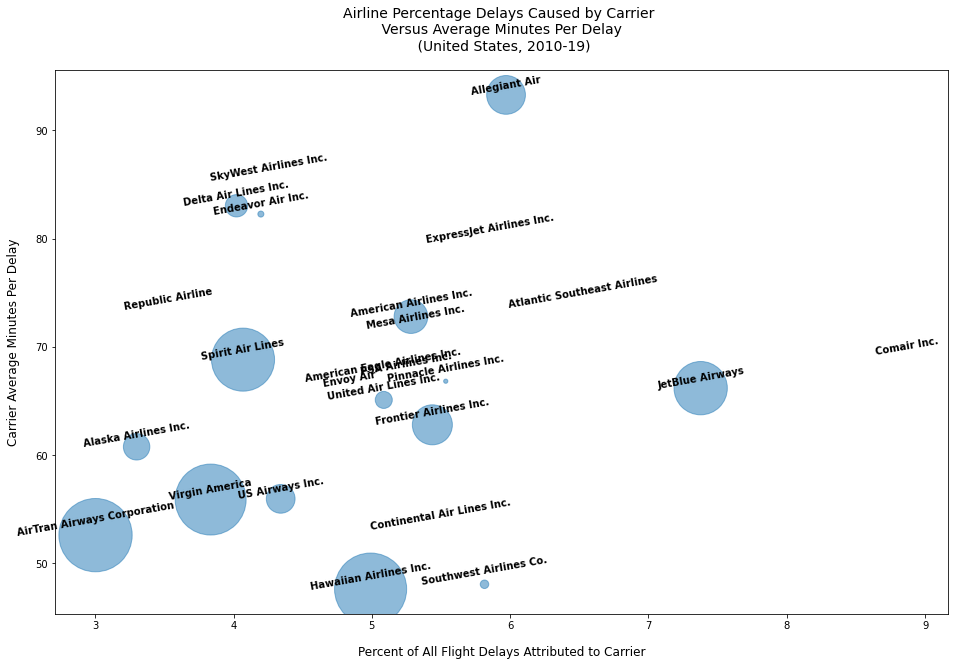

In [341]:
plt.rcParams['figure.figsize'] = [16, 10]

fig = plt.figure(figsize = (14,8))
fig.set_figwidth(28)
fig.set_figheight(16)

fig, ax = plt.subplots()

#plt.legend(loc = 'upper right')
plt.title('Airline Percentage Delays Caused by Carrier \n Versus Average Minutes Per Delay \n (United States, 2010-19)', fontsize=14, fontname="Arial Bold", color='black', pad=20)
plt.xlabel('Percent of All Flight Delays Attributed to Carrier', fontname="Arial Bold", fontsize=12, color='black', rotation=0, labelpad=15)
plt.ylabel('Carrier Average Minutes Per Delay', fontname="Arial Bold", fontsize=12, color='black', rotation=90, labelpad=15)



#ax.set_title('Day v/s No of Questions on GFG', fontsize=15)

ax.scatter(carrier_del_pass_stats['pct_del'], carrier_del_pass_stats['min_per_delay'], s=carrier_del_pass_stats['passengers_per_delay']*5, alpha=0.5)

for line in range(0,carrier_del_pass_stats.shape[0]):
     ax.text(carrier_del_pass_stats.pct_del[line], carrier_del_pass_stats.min_per_delay[line], carrier_del_pass_stats.carrier_del[line], horizontalalignment='center', rotation=10, size='medium', color='black', weight='semibold')

plt.show

In [ ]:
plt.figure(facecolor='white')
plt.barh(most_flights_top10['carrier_del'], most_flights_top10['df_sum_flights'],color='lightseagreen')
plt.gca().invert_yaxis()
plt.ylabel('Airlines', fontsize=10, color='black', rotation=90, labelpad=15)
plt.title('Top 10 Flight Totals by Carrier \n (United States, 2010-19)', fontsize=12, fontname="Times New Roman Bold", color='black', pad=20)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')

#plt.axvline(x=67521, color='r', linestyle='-', label=' U.S. Census \n National Household \n Median Income')
#plt.legend(loc = 'upper right')
plt.savefig('Top10_al_most_dest', dpi=200, transparent=True, bbox_inches='tight')
plt.show()